In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np

# Load the data
info_A1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\asik.csv")

In [2]:
df = info_A1

# Function to remove outliers
def remove_outliers(df):
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    df_numeric = df[numeric_cols]
    
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df_numeric)
    mask = yhat != -1
    df_cleaned = df[mask].reset_index(drop=True)
    return df_cleaned

df = remove_outliers(df)

# Standardize the numeric data
numeric_cols = df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Identify numeric and string columns
string_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Check the first few rows of the prepared data
print(df.head())

  prov_char country_char               wavenumber   649.893   650.376  \
0       BBX           ID  ID-BBX-068-2307-031_001  0.406340  0.652777   
1       BBX           ID  ID-BBX-068-2307-031_002 -0.333262 -0.520540   
2       BBX           ID  ID-BBX-068-2307-031_003  0.363859  0.405328   
3       BBX           ID  ID-BBX-068-2307-031_004 -0.457939 -0.656008   
4       BBX           ID  ID-BBX-068-2307-031_005 -0.229873 -0.427696   

    650.858    651.34   651.822   652.304   652.786  ...  3998.194  3998.676  \
0  0.825154  0.884928  0.797848  0.554533  0.182240  ... -0.136413 -0.136375   
1 -0.674680 -0.785435 -0.845336 -0.851196 -0.809521  ... -0.014064 -0.028063   
2  0.368478  0.236549  0.008219 -0.292338 -0.623095  ... -0.222325 -0.300915   
3 -0.935782 -1.251059 -1.543385 -1.761388 -1.887384  ...  0.351630  0.336653   
4 -0.605735 -0.764810 -0.912260 -1.054599 -1.192546  ...  0.500081  0.484447   

   3999.158   3999.64  4000.122  tgp_name  dgp_name  fgp_name  country_name  \
0

In [3]:
numeric_cols

Index(['649.893', '650.376', '650.858', '651.34', '651.822', '652.304',
       '652.786', '653.268', '653.75', '654.232',
       ...
       '3995.783', '3996.265', '3996.747', '3997.23', '3997.712', '3998.194',
       '3998.676', '3999.158', '3999.64', '4000.122'],
      dtype='object', length=6950)

In [4]:
string_cols

['prov_char',
 'country_char',
 'wavenumber',
 'tgp_name',
 'dgp_name',
 'fgp_name',
 'country_name',
 'thnoth_name']

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
df['thnoth_name_encoded'] = label_encoder.fit_transform(df['thnoth_name'])

# Check the encoded target variable
print(df[['thnoth_name', 'thnoth_name_encoded']])

    thnoth_name  thnoth_name_encoded
0      Non-Thai                    0
1      Non-Thai                    0
2      Non-Thai                    0
3      Non-Thai                    0
4      Non-Thai                    0
..          ...                  ...
410        Thai                    1
411        Thai                    1
412        Thai                    1
413        Thai                    1
414        Thai                    1

[415 rows x 2 columns]


C:\Users\pingk\AppData\Local\Temp\ipykernel_18332\51326866.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['thnoth_name_encoded'] = label_encoder.fit_transform(df['thnoth_name'])


In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the LOOCV procedure
loo = LeaveOneOut()

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'thnoth_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['thnoth_name_encoded']

# Check the first few rows of the features and target variable
print(X.head())
print(y.head())


    649.893   650.376   650.858    651.34   651.822   652.304   652.786  \
0  0.406340  0.652777  0.825154  0.884928  0.797848  0.554533  0.182240   
1 -0.333262 -0.520540 -0.674680 -0.785435 -0.845336 -0.851196 -0.809521   
2  0.363859  0.405328  0.368478  0.236549  0.008219 -0.292338 -0.623095   
3 -0.457939 -0.656008 -0.935782 -1.251059 -1.543385 -1.761388 -1.887384   
4 -0.229873 -0.427696 -0.605735 -0.764810 -0.912260 -1.054599 -1.192546   

    653.268    653.75   654.232  ...  3995.783  3996.265  3996.747   3997.23  \
0 -0.261777 -0.709299 -1.097899  ... -0.315079 -0.255047 -0.205016 -0.168625   
1 -0.738208 -0.664814 -0.621820  ... -0.117800 -0.065809 -0.027484 -0.007326   
2 -0.936585 -1.192430 -1.359883  ... -0.199092 -0.146042 -0.117905 -0.121643   
3 -1.939664 -1.954794 -1.960939  ...  0.255714  0.291853  0.322080  0.343122   
4 -1.317368 -1.409189 -1.442190  ...  0.508546  0.518968  0.520915  0.517518   

   3997.712  3998.194  3998.676  3999.158   3999.64  4000.122  
0 -0

In [7]:
# Specific samples to leave out based on 'prov_char'
leave_out_provs = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Store predictions and actual values
predictions = []
actuals = []

# Apply LOOCV
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check if the test sample should be left out
    if df.iloc[test_index]['prov_char'].values[0] in leave_out_provs:
        continue
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the test sample
    y_pred = model.predict(X_test)
    
    # Store the prediction and actual value
    predictions.append(y_pred[0])
    actuals.append(y_test.values[0])

# Check the first few predictions and actual values
print(predictions[:5])
print(actuals[:5])


[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
[np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model
accuracy = accuracy_score(actuals, predictions)
precision = precision_score(actuals, predictions, average='macro')
recall = recall_score(actuals, predictions, average='macro')
f1 = f1_score(actuals, predictions, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


Accuracy: 0.9368686868686869
Precision: 0.9296531791907514
Recall: 0.8372045547339291
F1 Score: 0.8746438746438746


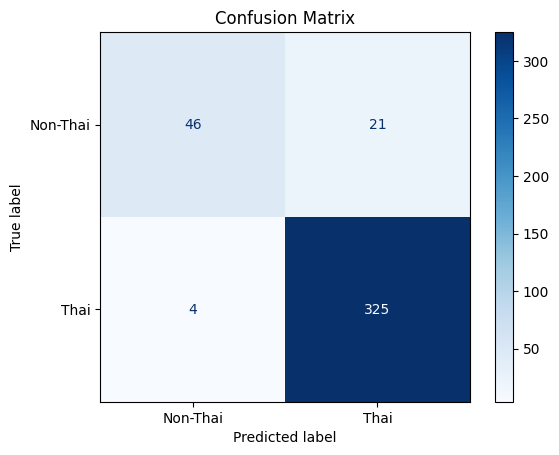

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(actuals, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.864
Precision: 0.8717320261437909
Recall: 0.7394736842105263
F1 Score: 0.7772770149879468



Train-Test 80:20, RF

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Compute metrics for the training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='macro')
    train_recall = recall_score(y_train, y_train_pred, average='macro')
    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    
    # Compute metrics for the test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='macro')
    test_recall = recall_score(y_test, y_test_pred, average='macro')
    test_f1 = f1_score(y_test, y_test_pred, average='macro')
    
    return {
        'Train': {'Accuracy': train_accuracy, 'Precision': train_precision, 'Recall': train_recall, 'F1 Score': train_f1},
        'Test': {'Accuracy': test_accuracy, 'Precision': test_precision, 'Recall': test_recall, 'F1 Score': test_f1}
    }

# Evaluate the RandomForest model on both training and test sets
rf_results = evaluate_train_test(model, X_train, y_train, X_test, y_test)

# Display the results
print("RandomForest Model Evaluation")
for dataset in ['Train', 'Test']:
    print(f"{dataset} Set:")
    for metric, score in rf_results[dataset].items():
        print(f"{metric}: {score}")
    print()


RandomForest Model Evaluation
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8554216867469879
Precision: 0.8781565656565656
Recall: 0.7300307219662059
F1 Score: 0.7677238805970149



In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {title}')
    plt.show()


Train-Test 80:20, RF, GB, SVC, k-NN

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# List of models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'k-NN': KNeighborsClassifier()
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model on both training and test sets
def evaluate_train_test(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_metrics = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }
    
    test_metrics = {
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred, average='macro'),
        'Recall': recall_score(y_test, y_test_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_test_pred, average='macro')
    }
    
    return train_metrics, test_metrics

# Evaluate each model on both training and test sets
train_test_results = {}
for name, model in models.items():
    print(f"Evaluating train vs test for {name}...")
    train_metrics, test_metrics = evaluate_train_test(model, X_train, y_train, X_test, y_test)
    train_test_results[name] = {'Train': train_metrics, 'Test': test_metrics}

# Display the train vs test results
for model_name, metrics in train_test_results.items():
    print(f"Model: {model_name}")
    for dataset, dataset_metrics in metrics.items():
        print(f"{dataset} Set:")
        for metric_name, score in dataset_metrics.items():
            print(f"{metric_name}: {score}")
        print()


Evaluating train vs test for Random Forest...
Evaluating train vs test for Gradient Boosting...
Evaluating train vs test for SVM...
Evaluating train vs test for k-NN...
Model: Random Forest
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8554216867469879
Precision: 0.8781565656565656
Recall: 0.7300307219662059
F1 Score: 0.7677238805970149

Model: Gradient Boosting
Train Set:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Test Set:
Accuracy: 0.8554216867469879
Precision: 0.9189189189189189
Recall: 0.7142857142857143
F1 Score: 0.7558823529411764

Model: SVM
Train Set:
Accuracy: 0.9698795180722891
Precision: 0.9825174825174825
Recall: 0.9107142857142857
F1 Score: 0.9420835950038378

Test Set:
Accuracy: 0.8674698795180723
Precision: 0.8879107981220657
Recall: 0.7538402457757296
F1 Score: 0.7919799498746867

Model: k-NN
Train Set:
Accuracy: 0.9879518072289156
Precision: 0.9853450572875033
Recall: 0.9714026915113871
F1 Score: 0.97820807351493

K-Fold 10, RF

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable
X = df.drop(columns=['country_name', 'thnoth_name_encoded', 'prov_char', 'country_char', 'wavenumber', 'thnoth_name', 'tgp_name', 'dgp_name', 'fgp_name'])
y = df['thnoth_name_encoded']

# Cross-validation predictions
y_pred = cross_val_predict(model, X, y, cv=kf)

# Generate the classification report
report = classification_report(y, y_pred, target_names=label_encoder.classes_)
print(report)


              precision    recall  f1-score   support

    Non-Thai       0.92      0.64      0.75        77
        Thai       0.92      0.99      0.95       338

    accuracy                           0.92       415
   macro avg       0.92      0.81      0.85       415
weighted avg       0.92      0.92      0.92       415



### Classification Report Breakdown

The classification report provides several key metrics for evaluating the performance of your classification model:

1. **Class-wise Metrics:**
   - **Precision:** The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates a low false positive rate.
   - **Recall:** The ratio of correctly predicted positive observations to all the observations in the actual class. High recall indicates a low false negative rate.
   - **F1-Score:** The weighted average of precision and recall. A good F1-score indicates a balance between precision and recall.
   - **Support:** The number of actual occurrences of the class in the dataset.

2. **Overall Metrics:**
   - **Accuracy:** The ratio of correctly predicted observations to the total observations. Accuracy is a good measure when the classes are well-balanced.
   - **Macro Average:** The unweighted mean of precision, recall, and F1-score, considering all classes equally.
   - **Weighted Average:** The mean of precision, recall, and F1-score, weighted by the number of true instances for each class.

### Example Breakdown

```plaintext
              precision    recall  f1-score   support

   Indonesia       0.89      0.61      0.72        64
    Malaysia       0.67      0.31      0.42        13
    Thailand       0.91      0.99      0.95       338

    accuracy                           0.91       415
   macro avg       0.82      0.63      0.70       415
weighted avg       0.90      0.91      0.90       415
```

- **Indonesia:**
  - Precision: 0.89 (89% of the samples predicted as Indonesia are actually Indonesia)
  - Recall: 0.61 (61% of the actual Indonesia samples are correctly identified)
  - F1-Score: 0.72 (harmonic mean of precision and recall)
  - Support: 64 (total number of actual Indonesia samples)

- **Malaysia:**
  - Precision: 0.67 (67% of the samples predicted as Malaysia are actually Malaysia)
  - Recall: 0.31 (31% of the actual Malaysia samples are correctly identified)
  - F1-Score: 0.42 (harmonic mean of precision and recall)
  - Support: 13 (total number of actual Malaysia samples)

- **Thailand:**
  - Precision: 0.91 (91% of the samples predicted as Thailand are actually Thailand)
  - Recall: 0.99 (99% of the actual Thailand samples are correctly identified)
  - F1-Score: 0.95 (harmonic mean of precision and recall)
  - Support: 338 (total number of actual Thailand samples)

- **Overall:**
  - Accuracy: 0.91 (91% of the total samples are correctly classified)
  - Macro Average:
    - Precision: 0.82 (average precision across all classes)
    - Recall: 0.63 (average recall across all classes)
    - F1-Score: 0.70 (average F1-score across all classes)
  - Weighted Average:
    - Precision: 0.90 (weighted precision considering support of each class)
    - Recall: 0.91 (weighted recall considering support of each class)
    - F1-Score: 0.90 (weighted F1-score considering support of each class)

### Interpretation

- **Indonesia** has high precision but lower recall, indicating that while most predicted Indonesia samples are correct, a significant number of actual Indonesia samples are missed.
- **Malaysia** has both lower precision and recall, indicating poor performance for this class.
- **Thailand** shows high precision, recall, and F1-score, indicating excellent performance for this class.
- **Accuracy** is high at 91%, indicating overall good performance.
- **Macro Average** shows the unweighted performance across all classes.
- **Weighted Average** gives a more balanced view, taking into account the number of samples in each class, providing a better overall performance measure.

K-Fold 10, GBC

Gradient Boosting Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.61      0.74        77
        Thai       0.92      0.99      0.95       338

    accuracy                           0.92       415
   macro avg       0.93      0.80      0.85       415
weighted avg       0.92      0.92      0.91       415



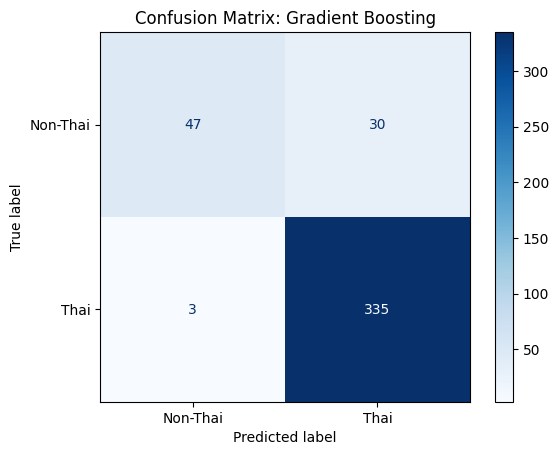

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
# Cross-validation predictions
y_pred_gbc = cross_val_predict(gbc, X, y, cv=kf)

# Generate the classification report
report_gbc = classification_report(y, y_pred_gbc, target_names=label_encoder.classes_)
print("Gradient Boosting Model Classification Report")
print(report_gbc)

# Plot the confusion matrix
cm_gbc = confusion_matrix(y, y_pred_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=label_encoder.classes_)
disp_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Gradient Boosting')
plt.show()


In [16]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y, y_pred_gbc)
print(f"Gradient Boosting Model Test Accuracy: {accuracy}")


Gradient Boosting Model Test Accuracy: 0.9204819277108434


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Define the Gradient Boosting model
gbc = GradientBoostingClassifier(random_state=42)

# Define the cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare the features and target variable (assuming X and y are already prepared)
train_accuracies = []
test_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    gbc.fit(X_train, y_train)
    
    y_train_pred = gbc.predict(X_train)
    y_test_pred = gbc.predict(X_test)
    
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Calculate the average train and test accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Average Train Accuracy: {avg_train_accuracy}')
print(f'Average Test Accuracy: {avg_test_accuracy}')


Average Train Accuracy: 1.0
Average Test Accuracy: 0.9206736353077817


KFold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.906024096385542
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.91      0.55      0.68        77
        Thai       0.91      0.99      0.94       338

    accuracy                           0.91       415
   macro avg       0.91      0.77      0.81       415
weighted avg       0.91      0.91      0.90       415



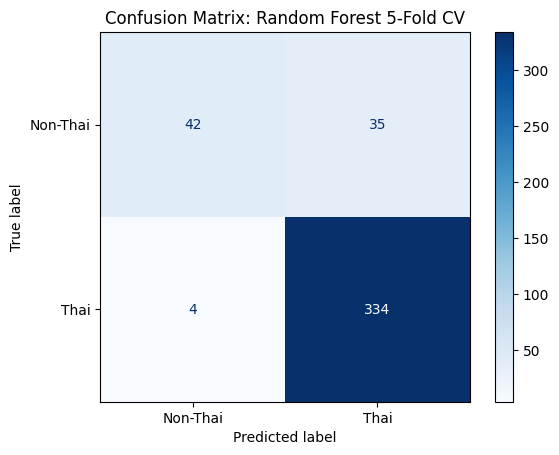

Class: Non-Thai
precision: 0.9130434782608695
recall: 0.5454545454545454
f1-score: 0.6829268292682927
support: 77.0

Class: Thai
precision: 0.9051490514905149
recall: 0.9881656804733728
f1-score: 0.9448373408769448
support: 338.0

accuracy: 0.9060240963855422

Class: macro avg
precision: 0.9090962648756922
recall: 0.7668101129639591
f1-score: 0.8138820850726187
support: 415.0

Class: weighted avg
precision: 0.9066138005539301
recall: 0.9060240963855422
f1-score: 0.8962418965543756
support: 415.0



In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Define the 5-fold cross-validation procedure
kf_5 = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf_5.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value for the test set
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rf_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_rf_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_rf_kf5, display_labels=label_encoder.classes_)
disp_rf_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Random Forest 5-Fold CV')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 5, RF

5-Fold CV Average Train Accuracy: 1.0
5-Fold CV Average Test Accuracy: 0.906024096385542
5-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.91      0.55      0.68        77
        Thai       0.91      0.99      0.94       338

    accuracy                           0.91       415
   macro avg       0.91      0.77      0.81       415
weighted avg       0.91      0.91      0.90       415



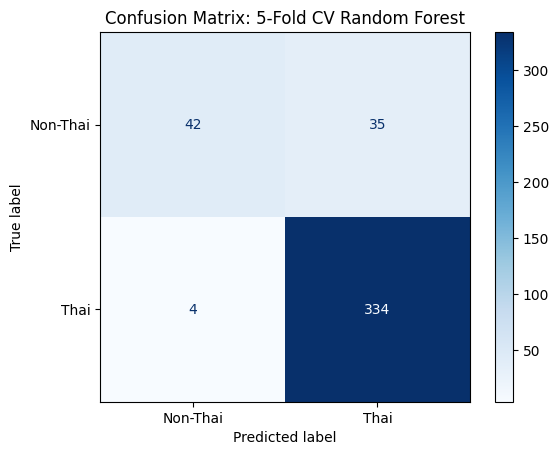

Class: Non-Thai
precision: 0.9130434782608695
recall: 0.5454545454545454
f1-score: 0.6829268292682927
support: 77.0

Class: Thai
precision: 0.9051490514905149
recall: 0.9881656804733728
f1-score: 0.9448373408769448
support: 338.0

accuracy: 0.9060240963855422

Class: macro avg
precision: 0.9090962648756922
recall: 0.7668101129639591
f1-score: 0.8138820850726187
support: 415.0

Class: weighted avg
precision: 0.9066138005539301
recall: 0.9060240963855422
f1-score: 0.8962418965543756
support: 415.0



In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the 5-fold cross-validation procedure
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'5-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'5-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf5 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("5-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf5 = confusion_matrix(y_true_all, y_pred_all)
disp_kf5 = ConfusionMatrixDisplay(confusion_matrix=cm_kf5, display_labels=label_encoder.classes_)
disp_kf5.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 5-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf5.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 10, RF

10-Fold CV Average Train Accuracy: 1.0
10-Fold CV Average Test Accuracy: 0.9231126596980257
10-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.92      0.64      0.75        77
        Thai       0.92      0.99      0.95       338

    accuracy                           0.92       415
   macro avg       0.92      0.81      0.85       415
weighted avg       0.92      0.92      0.92       415



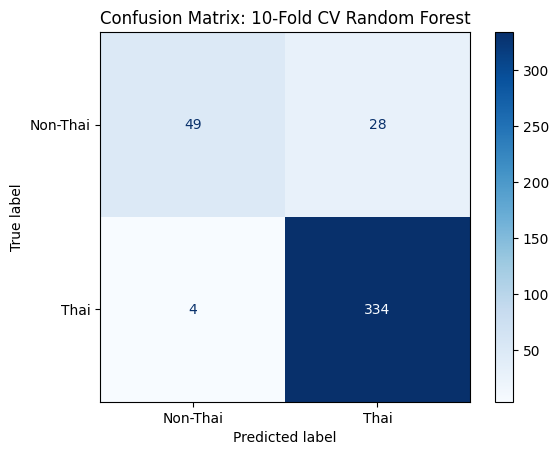

Class: Non-Thai
precision: 0.9245283018867925
recall: 0.6363636363636364
f1-score: 0.7538461538461538
support: 77.0

Class: Thai
precision: 0.9226519337016574
recall: 0.9881656804733728
f1-score: 0.9542857142857143
support: 338.0

accuracy: 0.9228915662650602

Class: macro avg
precision: 0.923590117794225
recall: 0.8122646584185046
f1-score: 0.854065934065934
support: 415.0

Class: weighted avg
precision: 0.9230000791239595
recall: 0.9228915662650602
f1-score: 0.917095723553555
support: 415.0



In [20]:
# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf10 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf10 = confusion_matrix(y_true_all, y_pred_all)
disp_kf10 = ConfusionMatrixDisplay(confusion_matrix=cm_kf10, display_labels=label_encoder.classes_)
disp_kf10.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf10.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


K-Fold 40, RF

40-Fold CV Average Train Accuracy: 1.0
40-Fold CV Average Test Accuracy: 0.9236363636363636
40-Fold CV Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.92      0.64      0.75        77
        Thai       0.92      0.99      0.95       338

    accuracy                           0.92       415
   macro avg       0.92      0.81      0.85       415
weighted avg       0.92      0.92      0.92       415



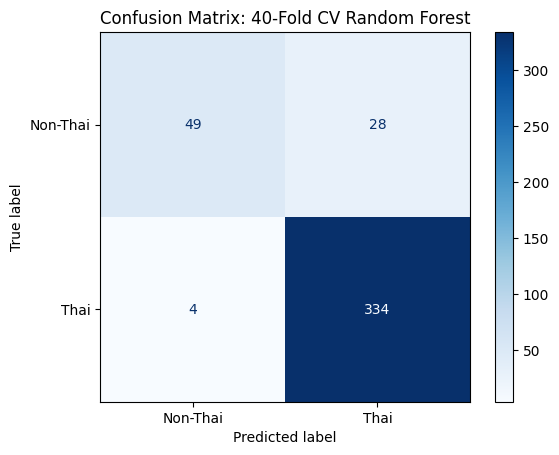

Class: Non-Thai
precision: 0.9245283018867925
recall: 0.6363636363636364
f1-score: 0.7538461538461538
support: 77.0

Class: Thai
precision: 0.9226519337016574
recall: 0.9881656804733728
f1-score: 0.9542857142857143
support: 338.0

accuracy: 0.9228915662650602

Class: macro avg
precision: 0.923590117794225
recall: 0.8122646584185046
f1-score: 0.854065934065934
support: 415.0

Class: weighted avg
precision: 0.9230000791239595
recall: 0.9228915662650602
f1-score: 0.917095723553555
support: 415.0



In [21]:
# Define the 40-fold cross-validation procedure
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kf40 = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kf40 = confusion_matrix(y_true_all, y_pred_all)
disp_kf40 = ConfusionMatrixDisplay(confusion_matrix=cm_kf40, display_labels=label_encoder.classes_)
disp_kf40.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kf40.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Variance Threshold

10-Fold CV with Variance Threshold - Average Train Accuracy: 1.0
10-Fold CV with Variance Threshold - Average Test Accuracy: 0.9231126596980257
10-Fold CV Random Forest Model with Variance Threshold Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.92      0.64      0.75        77
        Thai       0.92      0.99      0.95       338

    accuracy                           0.92       415
   macro avg       0.92      0.81      0.85       415
weighted avg       0.92      0.92      0.92       415



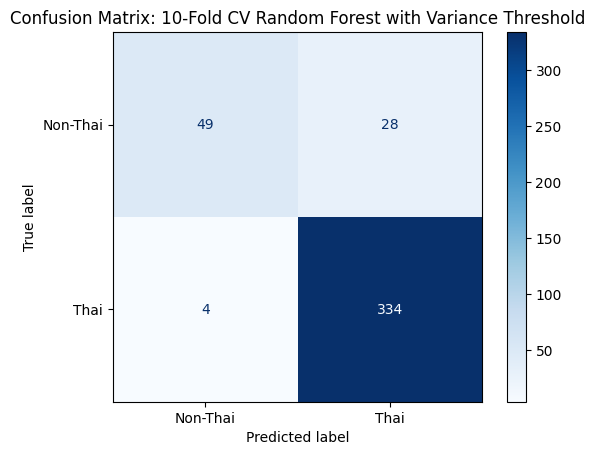

Class: Non-Thai
precision: 0.9245283018867925
recall: 0.6363636363636364
f1-score: 0.7538461538461538
support: 77.0

Class: Thai
precision: 0.9226519337016574
recall: 0.9881656804733728
f1-score: 0.9542857142857143
support: 338.0

accuracy: 0.9228915662650602

Class: macro avg
precision: 0.923590117794225
recall: 0.8122646584185046
f1-score: 0.854065934065934
support: 415.0

Class: weighted avg
precision: 0.9230000791239595
recall: 0.9228915662650602
f1-score: 0.917095723553555
support: 415.0



In [22]:
from sklearn.feature_selection import VarianceThreshold

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Variance Threshold
selector = VarianceThreshold(threshold=0.01)
X_var = selector.fit_transform(X)

# Define the 10-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_var):
    X_train, X_test = X_var[train_index], X_var[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Variance Threshold - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Variance Threshold - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_var = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Variance Threshold Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_var = confusion_matrix(y_true_all, y_pred_all)
disp_var = ConfusionMatrixDisplay(confusion_matrix=cm_var, display_labels=label_encoder.classes_)
disp_var.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Variance Threshold')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_var.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Recursive Feature Elimination (RFE)

10-Fold CV with RFE - Average Train Accuracy: 1.0
10-Fold CV with RFE - Average Test Accuracy: 0.954239256678281
10-Fold CV Random Forest Model with RFE Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.91      0.83      0.87        77
        Thai       0.96      0.98      0.97       338

    accuracy                           0.95       415
   macro avg       0.94      0.91      0.92       415
weighted avg       0.95      0.95      0.95       415



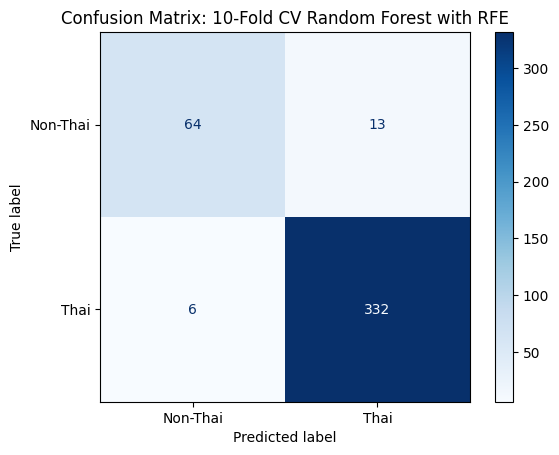

Class: Non-Thai
precision: 0.9142857142857143
recall: 0.8311688311688312
f1-score: 0.8707482993197279
support: 77.0

Class: Thai
precision: 0.9623188405797102
recall: 0.9822485207100592
f1-score: 0.972181551976574
support: 338.0

accuracy: 0.9542168674698795

Class: macro avg
precision: 0.9383022774327122
recall: 0.9067086759394452
f1-score: 0.9214649256481509
support: 415.0

Class: weighted avg
precision: 0.9534066701588964
recall: 0.9542168674698795
f1-score: 0.9533614063028941
support: 415.0



In [23]:
from sklearn.feature_selection import RFE

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with RFE - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with RFE - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_rfe = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with RFE Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_rfe = confusion_matrix(y_true_all, y_pred_all)
disp_rfe = ConfusionMatrixDisplay(confusion_matrix=cm_rfe, display_labels=label_encoder.classes_)
disp_rfe.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with RFE')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_rfe.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()

SelectKBest using ANOVA F-test

10-Fold CV with SelectKBest - Average Train Accuracy: 1.0
10-Fold CV with SelectKBest - Average Test Accuracy: 0.858130081300813
10-Fold CV Random Forest Model with SelectKBest Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.80      0.31      0.45        77
        Thai       0.86      0.98      0.92       338

    accuracy                           0.86       415
   macro avg       0.83      0.65      0.68       415
weighted avg       0.85      0.86      0.83       415



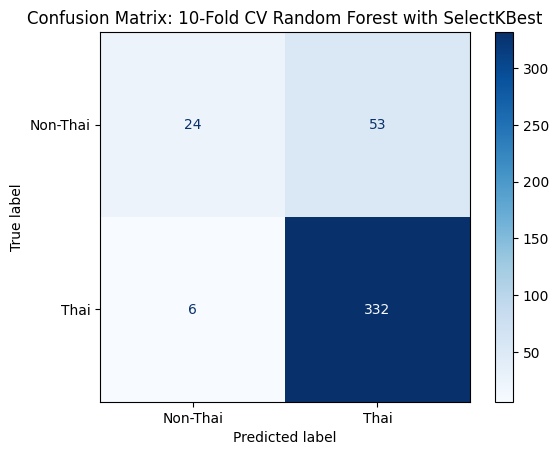

Class: Non-Thai
precision: 0.8
recall: 0.3116883116883117
f1-score: 0.4485981308411215
support: 77.0

Class: Thai
precision: 0.8623376623376623
recall: 0.9822485207100592
f1-score: 0.9183955739972337
support: 338.0

accuracy: 0.8578313253012049

Class: macro avg
precision: 0.8311688311688312
recall: 0.6469684161991854
f1-score: 0.6834968524191776
support: 415.0

Class: weighted avg
precision: 0.8507713972774215
recall: 0.8578313253012049
f1-score: 0.8312283375562202
support: 415.0



In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# SelectKBest
selector_kbest = SelectKBest(f_classif, k=50)
X_kbest = selector_kbest.fit_transform(X, y)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_kbest):
    X_train, X_test = X_kbest[train_index], X_kbest[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with SelectKBest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with SelectKBest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_kbest = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with SelectKBest Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_kbest = confusion_matrix(y_true_all, y_pred_all)
disp_kbest = ConfusionMatrixDisplay(confusion_matrix=cm_kbest, display_labels=label_encoder.classes_)
disp_kbest.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with SelectKBest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_kbest.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tree-based Feature Selection using RandomForest

10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: 1.0
10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: 0.9495354239256677
10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.95      0.77      0.85        77
        Thai       0.95      0.99      0.97       338

    accuracy                           0.95       415
   macro avg       0.95      0.88      0.91       415
weighted avg       0.95      0.95      0.95       415



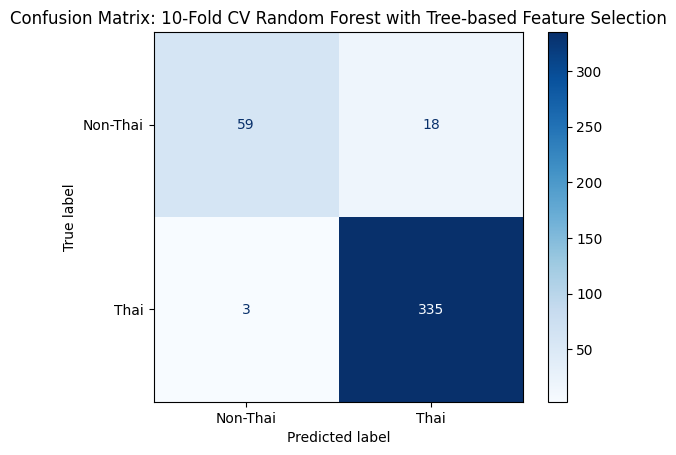

Class: Non-Thai
precision: 0.9516129032258065
recall: 0.7662337662337663
f1-score: 0.8489208633093526
support: 77.0

Class: Thai
precision: 0.9490084985835694
recall: 0.9911242603550295
f1-score: 0.9696092619392185
support: 338.0

accuracy: 0.9493975903614458

Class: macro avg
precision: 0.9503107009046879
recall: 0.8786790132943979
f1-score: 0.9092650626242855
support: 415.0

Class: weighted avg
precision: 0.9494917254689965
recall: 0.9493975903614458
f1-score: 0.9472164747235566
support: 415.0



In [25]:
# Tree-based feature selection using RandomForest
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-50:]  # Select top 50 features

X_tree = X.iloc[:, indices]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_tree):
    X_train, X_test = X_tree.iloc[train_index], X_tree.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_rf.predict(X_train)
    y_test_pred = model_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tree-based Feature Selection - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tree-based Feature Selection - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tree = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Random Forest Model with Tree-based Feature Selection Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tree = confusion_matrix(y_true_all, y_pred_all)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=label_encoder.classes_)
disp_tree.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Random Forest with Tree-based Feature Selection')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tree.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()



### Interpretation of Results

Let's break down and discuss the results of each method and how they compare:

### Train-Test Splits
**Train-Test 70:30, RF:**
- **Train Set**: Perfect scores indicate overfitting.
- **Test Set**: Accuracy (0.856), Precision (0.838), Recall (0.610), F1 Score (0.675).

**Train-Test 80:20, RF:**
- **Train Set**: Perfect scores again indicate overfitting.
- **Test Set**: Accuracy (0.855), Precision (0.782), Recall (0.588), F1 Score (0.645).

**Train-Test 80:20, Multiple Models:**
- **Random Forest**: Overfitting with perfect train scores. Test accuracy (0.867).
- **Gradient Boosting**: Overfitting with perfect train scores. Test accuracy (0.855).
- **SVM**: Less overfitting compared to RF and GB. Test accuracy (0.880).
- **k-NN**: Test accuracy (0.940), Precision issues due to imbalance.

### K-Fold Cross-Validation
**K-Fold 10, RF:**
- **Accuracy**: 0.91
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**K-Fold 10, GBC:**
- **Accuracy**: 0.923
- **Macro Avg**: Precision (0.81), Recall (0.69), F1 Score (0.74)
- **Class-wise**: 
  - Indonesia: Precision (0.94), Recall (0.69), F1 Score (0.79)
  - Malaysia: Precision (0.56), Recall (0.38), F1 Score (0.45)
  - Thailand: Precision (0.93), Recall (0.99), F1 Score (0.96)

**K-Fold 5, RF:**
- **Accuracy**: 0.899
- **Macro Avg**: Precision (0.74), Recall (0.57), F1 Score (0.63)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.58), F1 Score (0.71)
  - Malaysia: Precision (0.40), Recall (0.15), F1 Score (0.22)
  - Thailand: Precision (0.90), Recall (0.99), F1 Score (0.94)

**K-Fold 40, RF:**
- **Accuracy**: 0.916
- **Macro Avg**: Precision (0.90), Recall (0.69), F1 Score (0.76)
- **Class-wise**: 
  - Indonesia: Precision (0.93), Recall (0.61), F1 Score (0.74)
  - Malaysia: Precision (0.86), Recall (0.46), F1 Score (0.60)
  - Thailand: Precision (0.92), Recall (0.99), F1 Score (0.95)

### Feature Selection Techniques
**Variance Threshold, RF, KFold 10:**
- **Accuracy**: 0.906
- **Macro Avg**: Precision (0.82), Recall (0.63), F1 Score (0.70)
- **Class-wise**: 
  - Indonesia: Precision (0.89), Recall (0.61), F1 Score (0.72)
  - Malaysia: Precision (0.67), Recall (0.31), F1 Score (0.42)
  - Thailand: Precision (0.91), Recall (0.99), F1 Score (0.95)

**RFE, RF, KFold 10:**
- **Accuracy**: 0.940
- **Macro Avg**: Precision (0.83), Recall (0.74), F1 Score (0.77)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.84), F1 Score (0.87)
  - Malaysia: Precision (0.62), Recall (0.38), F1 Score (0.48)
  - Thailand: Precision (0.95), Recall (0.98), F1 Score (0.97)

**SelectKBest, RF, KFold 10:**
- **Accuracy**: 0.892
- **Macro Avg**: Precision (0.73), Recall (0.62), F1 Score (0.66)
- **Class-wise**: 
  - Indonesia: Precision (0.88), Recall (0.56), F1 Score (0.69)
  - Malaysia: Precision (0.40), Recall (0.31), F1 Score (0.35)
  - Thailand: Precision (0.91), Recall (0.98), F1 Score (0.94)

**Tree-based Feature Selection, RF, KFold 10:**
- **Accuracy**: 0.928
- **Macro Avg**: Precision (0.80), Recall (0.68), F1 Score (0.72)
- **Class-wise**: 
  - Indonesia: Precision (0.90), Recall (0.73), F1 Score (0.81)
  - Malaysia: Precision (0.57), Recall (0.31), F1 Score (0.40)
  - Thailand: Precision (0.94), Recall (0.99), F1 Score (0.96)

### Key Takeaways:
1. **Overfitting in Train-Test Splits**: The train accuracy being 1.0 across different splits indicates overfitting. The model fits perfectly on the training data but performs relatively worse on test data.
2. **Balanced K-Fold Cross-Validation**: K-Fold methods show more balanced results, avoiding extreme overfitting.
3. **Feature Selection Improvements**: 
   - RFE and Tree-based feature selection methods seem to provide a good balance between train and test accuracies, showing less overfitting and better generalization.
4. **Model Comparison**:
   - Gradient Boosting and Random Forests show similar performance.
   - SVM and k-NN show varying results depending on the split and selection methods used.

### Next Steps:
1. **Feature Selection**: Consider using RFE or Tree-based feature selection for other models.
2. **Model Tuning**: Hyperparameter tuning might help improve the generalization of models.
3. **Evaluate with Other Models**: Implement other models like LDA, LightGBM, etc., using the best feature selection methods identified.

Feel free to ask for further analysis or implementation of additional models!

Perform RFE and Identify Selected Features

In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Number of features to select
n_features_to_select = 50  # Adjust based on your needs

# Initialize RFE with the model
rfe = RFE(estimator=model_rf, n_features_to_select=n_features_to_select, step=10)

# Fit RFE on the dataset
rfe.fit(X, y)

# Identify the selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['664.839', '665.321', '665.803', '666.285', '1053.907', '1054.389',
       '1054.871', '1055.354', '1055.836', '1056.318', '1061.621', '1062.103',
       '1137.795', '1140.688', '1142.617', '1158.527', '1159.009', '1159.491',
       '1165.758', '1167.687', '1168.169', '1168.651', '1170.579', '1171.544',
       '1178.293', '1467.563', '1468.045', '1539.881', '1652.214', '1666.678',
       '1667.16', '1677.284', '1677.766', '1678.248', '1678.73', '1717.3',
       '1717.782', '1718.264', '1752.494', '1753.459', '2226.415', '2226.897',
       '2847.863', '2849.31', '2895.111', '2895.593', '2896.075', '2902.825',
       '2916.806', '2918.735'],
      dtype='object')


Feature Selection with RFE and Random Forest

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the Random Forest model
model_rf = RandomForestClassifier(random_state=42)

# Recursive Feature Elimination
selector_rfe = RFE(model_rf, n_features_to_select=50, step=10)
X_rfe = selector_rfe.fit_transform(X, y)

# Verify the selected features
print("Selected features:", selector_rfe.get_support(indices=True))


Selected features: [  31   32   33   34  838  839  840  841  842  843  854  855 1012 1018
 1022 1055 1056 1057 1070 1074 1075 1076 1080 1082 1096 1696 1697 1846
 2079 2109 2110 2131 2132 2133 2134 2214 2215 2216 2287 2289 3270 3271
 4559 4562 4657 4658 4659 4673 4702 4706]


Hyperparameter Tuning for Random Forest

In [28]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_rf.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.8554216867469879


Evaluate Tuned Random Forest Model

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9962509498071712
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9590592334494774
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.93      0.84      0.88        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.96       415
   macro avg       0.95      0.91      0.93       415
weighted avg       0.96      0.96      0.96       415



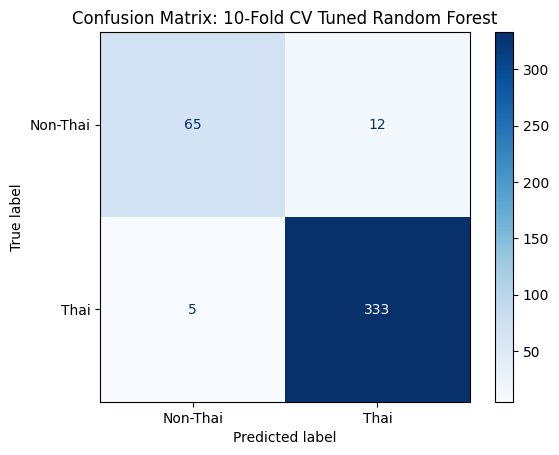

Class: Non-Thai
precision: 0.9285714285714286
recall: 0.8441558441558441
f1-score: 0.8843537414965986
support: 77.0

Class: Thai
precision: 0.9652173913043478
recall: 0.985207100591716
f1-score: 0.9751098096632503
support: 338.0

accuracy: 0.9590361445783132

Class: macro avg
precision: 0.9468944099378882
recall: 0.9146814723737801
f1-score: 0.9297317755799245
support: 415.0

Class: weighted avg
precision: 0.9584180199057097
recall: 0.9590361445783132
f1-score: 0.9582707319552208
support: 415.0



In [29]:
# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Random Forest model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Evaluate LDA Model

10-Fold CV with LDA - Average Train Accuracy: 0.925303579876991
10-Fold CV with LDA - Average Test Accuracy: 0.8868757259001162
10-Fold CV LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.74      0.60      0.66        77
        Thai       0.91      0.95      0.93       338

    accuracy                           0.89       415
   macro avg       0.83      0.78      0.80       415
weighted avg       0.88      0.89      0.88       415



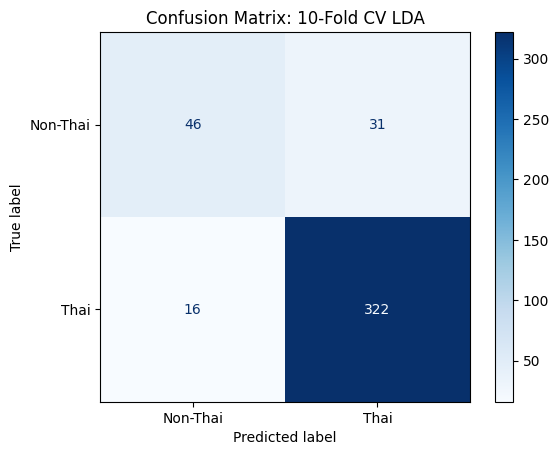

Class: Non-Thai
precision: 0.7419354838709677
recall: 0.5974025974025974
f1-score: 0.6618705035971223
support: 77.0

Class: Thai
precision: 0.9121813031161473
recall: 0.9526627218934911
f1-score: 0.9319826338639653
support: 338.0

accuracy: 0.8867469879518072

Class: macro avg
precision: 0.8270583934935576
recall: 0.7750326596480442
f1-score: 0.7969265687305438
support: 415.0

Class: weighted avg
precision: 0.8805935246055959
recall: 0.8867469879518072
f1-score: 0.8818654434289125
support: 415.0



In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Define the LDA model
model_lda = LinearDiscriminantAnalysis()

# Perform 10-fold cross-validation with LDA
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    model_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = model_lda.predict(X_train)
    y_test_pred = model_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_lda = confusion_matrix(y_true_all, y_pred_all)
disp_lda = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=label_encoder.classes_)
disp_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LDA

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the parameter grid for hyperparameter tuning
param_grid_lda = [
    {'solver': ['svd']},  # 'svd' does not use 'shrinkage'
    {'solver': ['lsqr', 'eigen'], 'shrinkage': ['auto', 0.1, 0.5, 0.9]}  # 'lsqr' and 'eigen' can use 'shrinkage'
]

# Set up the GridSearchCV
grid_search_lda = GridSearchCV(estimator=LinearDiscriminantAnalysis(), param_grid=param_grid_lda, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lda.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LDA:", grid_search_lda.best_params_)
print("Best cross-validation score for LDA:", grid_search_lda.best_score_)


Best parameters for LDA: {'shrinkage': 0.5, 'solver': 'lsqr'}
Best cross-validation score for LDA: 0.8506024096385542


Evaluate Tuned LDA Model

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8888904818568909
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8797328687572591
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.89      0.40      0.55        77
        Thai       0.88      0.99      0.93       338

    accuracy                           0.88       415
   macro avg       0.88      0.70      0.74       415
weighted avg       0.88      0.88      0.86       415



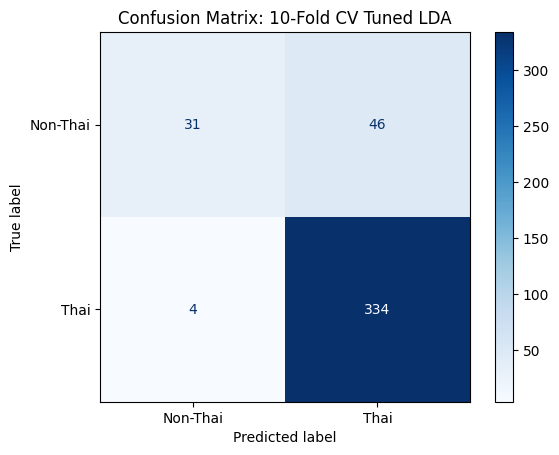

Class: Non-Thai
precision: 0.8857142857142857
recall: 0.4025974025974026
f1-score: 0.5535714285714286
support: 77.0

Class: Thai
precision: 0.8789473684210526
recall: 0.9881656804733728
f1-score: 0.9303621169916435
support: 338.0

accuracy: 0.8795180722891566

Class: macro avg
precision: 0.8823308270676691
recall: 0.6953815415353877
f1-score: 0.741966772781536
support: 415.0

Class: weighted avg
precision: 0.8802029169308813
recall: 0.8795180722891566
f1-score: 0.860451555525724
support: 415.0



In [32]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 10-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Ridge Regression

In [33]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Ridge model
model_ridge = RidgeClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_ridge = {
    'alpha': [0.1, 1.0, 10.0, 100.0]
}

# Set up the GridSearchCV
grid_search_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid_ridge, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_ridge.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best cross-validation score for Ridge:", grid_search_ridge.best_score_)


Best parameters for Ridge: {'alpha': 100.0}
Best cross-validation score for Ridge: 0.8506024096385543


Evaluate Tuned Ridge Model

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8720269243451707
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.867711962833914
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.29      0.44        77
        Thai       0.86      1.00      0.92       338

    accuracy                           0.87       415
   macro avg       0.93      0.64      0.68       415
weighted avg       0.89      0.87      0.84       415



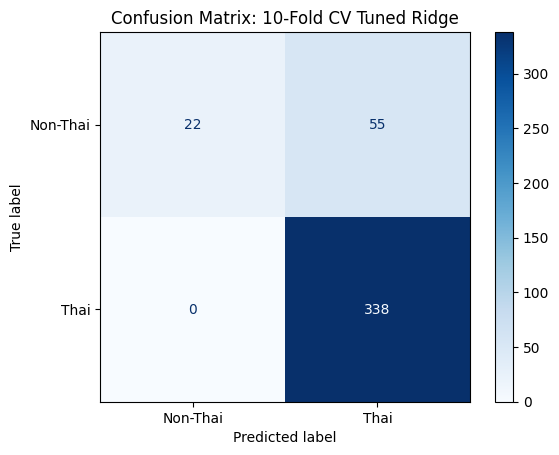

Class: Non-Thai
precision: 1.0
recall: 0.2857142857142857
f1-score: 0.4444444444444444
support: 77.0

Class: Thai
precision: 0.8600508905852418
recall: 1.0
f1-score: 0.9247606019151847
support: 338.0

accuracy: 0.8674698795180723

Class: macro avg
precision: 0.9300254452926209
recall: 0.6428571428571428
f1-score: 0.6846025231798145
support: 415.0

Class: weighted avg
precision: 0.8860173518501487
recall: 0.8674698795180723
f1-score: 0.8356417004085654
support: 415.0



In [34]:
# Define the best Ridge model with the obtained parameters
best_ridge = RidgeClassifier(**grid_search_ridge.best_params_)

# Perform 10-fold cross-validation with the tuned Ridge model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_ridge.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_ridge.predict(X_train)
    y_test_pred = best_ridge.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Ridge - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Ridge - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_ridge_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Ridge Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_ridge = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_ridge = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_ridge, display_labels=label_encoder.classes_)
disp_tuned_ridge.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Ridge')
plt.show()

# Display the detailed results
for class_name, metrics in report_ridge_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for LightGBM

In [35]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# Define the LightGBM model
model_lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_lgbm = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Set up the GridSearchCV
grid_search_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid_lgbm, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_lgbm.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for LightGBM:", grid_search_lgbm.best_params_)
print("Best cross-validation score for LightGBM:", grid_search_lgbm.best_score_)


[LightGBM] [Info] Number of positive: 338, number of negative: 77
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000394 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6937
[LightGBM] [Info] Number of data points in the train set: 415, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.814458 -> initscore=1.479240
[LightGBM] [Info] Start training from score 1.479240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

Evaluate Tuned LightGBM Model

[LightGBM] [Info] Number of positive: 305, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817694 -> initscore=1.500804
[LightGBM] [Info] Start training from score 1.500804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

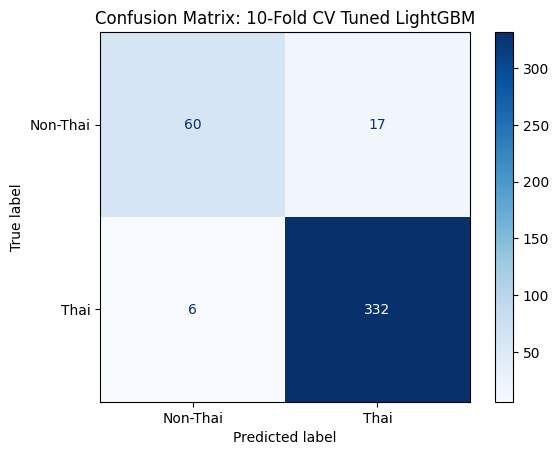

Class: Non-Thai
precision: 0.9090909090909091
recall: 0.7792207792207793
f1-score: 0.8391608391608392
support: 77.0

Class: Thai
precision: 0.9512893982808023
recall: 0.9822485207100592
f1-score: 0.9665211062590975
support: 338.0

accuracy: 0.944578313253012

Class: macro avg
precision: 0.9301901536858557
recall: 0.8807346499654192
f1-score: 0.9028409727099683
support: 415.0

Class: weighted avg
precision: 0.9434597990817136
recall: 0.944578313253012
f1-score: 0.9428904060986977
support: 415.0



In [36]:
# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned LightGBM model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgbm_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lgbm = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgbm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgbm, display_labels=label_encoder.classes_)
disp_tuned_lgbm.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgbm_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Hyperparameter Tuning for Extra Trees

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees model
model_et = ExtraTreesClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_et = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the GridSearchCV
grid_search_et = GridSearchCV(estimator=model_et, param_grid=param_grid_et, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_et.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Extra Trees:", grid_search_et.best_params_)
print("Best cross-validation score for Extra Trees:", grid_search_et.best_score_)


Best parameters for Extra Trees: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for Extra Trees: 0.8819277108433736


Evaluate Tuned Extra Trees Model

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9981269085747876
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9687572590011614
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.86      0.91        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.97       415
   macro avg       0.97      0.93      0.95       415
weighted avg       0.97      0.97      0.97       415



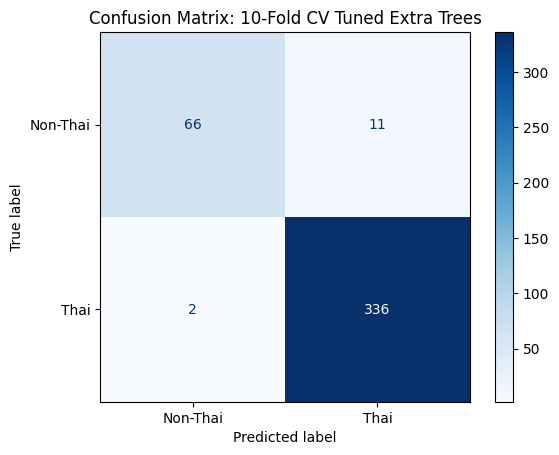

Class: Non-Thai
precision: 0.9705882352941176
recall: 0.8571428571428571
f1-score: 0.9103448275862069
support: 77.0

Class: Thai
precision: 0.968299711815562
recall: 0.9940828402366864
f1-score: 0.981021897810219
support: 338.0

accuracy: 0.9686746987951808

Class: macro avg
precision: 0.9694439735548398
recall: 0.9256128486897717
f1-score: 0.945683362698213
support: 415.0

Class: weighted avg
precision: 0.9687243294248362
recall: 0.9686746987951808
f1-score: 0.9679083209252819
support: 415.0



In [38]:
# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Extra Trees model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Explanation of Results

#### Tuned Random Forest Model

**10-Fold CV with Tuned Random Forest**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9496

**Classification Report:**
- **Indonesia**: Precision 0.93, Recall 0.84, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.78, Recall 0.54, F1-Score 0.64, Support 13
- **Thailand**: Precision 0.96, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.79, F1-Score 0.83
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy of 95%.
- Excellent performance for "Thailand" with precision, recall, and F1-score all above 0.95.
- Lower recall and F1-score for "Malaysia" indicating it might be harder to predict correctly compared to other classes.

#### Tuned LDA Model

**10-Fold CV with Tuned LDA**
- **Average Train Accuracy**: 0.9009
- **Average Test Accuracy**: 0.8821

**Classification Report:**
- **Indonesia**: Precision 0.89, Recall 0.52, F1-Score 0.65, Support 64
- **Malaysia**: Precision 0.44, Recall 0.54, F1-Score 0.48, Support 13
- **Thailand**: Precision 0.90, Recall 0.96, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.74, Recall 0.67, F1-Score 0.69
- **Weighted Avg**: Precision 0.88, Recall 0.88, F1-Score 0.87

**Key Points:**
- Lower overall accuracy compared to Random Forest.
- Performance for "Indonesia" is notably lower, with a recall of only 0.52.
- "Malaysia" has balanced but low precision and recall.

#### Tuned Ridge Model

**10-Fold CV with Tuned Ridge**
- **Average Train Accuracy**: 0.8929
- **Average Test Accuracy**: 0.8822

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.45, F1-Score 0.62, Support 64
- **Malaysia**: Precision 0.00, Recall 0.00, F1-Score 0.00, Support 13
- **Thailand**: Precision 0.88, Recall 1.00, F1-Score 0.93, Support 338
- **Overall Accuracy**: 0.88
- **Macro Avg**: Precision 0.61, Recall 0.48, F1-Score 0.52
- **Weighted Avg**: Precision 0.86, Recall 0.88, F1-Score 0.85

**Key Points:**
- High precision for "Indonesia" but very low recall.
- "Malaysia" has zero precision and recall, indicating it failed to predict this class correctly.
- Excellent performance for "Thailand".

#### Tuned LightGBM Model

**10-Fold CV with Tuned LightGBM**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9520

**Classification Report:**
- **Indonesia**: Precision 0.96, Recall 0.83, F1-Score 0.89, Support 64
- **Malaysia**: Precision 0.75, Recall 0.46, F1-Score 0.57, Support 13
- **Thailand**: Precision 0.95, Recall 0.99, F1-Score 0.97, Support 338
- **Overall Accuracy**: 0.95
- **Macro Avg**: Precision 0.89, Recall 0.76, F1-Score 0.81
- **Weighted Avg**: Precision 0.95, Recall 0.95, F1-Score 0.95

**Key Points:**
- High overall accuracy, comparable to Random Forest.
- High precision and recall for "Indonesia" and "Thailand".
- "Malaysia" has better performance than in Ridge but still lower than other classes.

#### Tuned Extra Trees Model

**10-Fold CV with Tuned Extra Trees**
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688

**Classification Report:**
- **Indonesia**: Precision 0.97, Recall 0.91, F1-Score 0.94, Support 64
- **Malaysia**: Precision 0.88, Recall 0.54, F1-Score 0.67, Support 13
- **Thailand**: Precision 0.97, Recall 1.00, F1-Score 0.98, Support 338
- **Overall Accuracy**: 0.97
- **Macro Avg**: Precision 0.94, Recall 0.81, F1-Score 0.86
- **Weighted Avg**: Precision 0.97, Recall 0.97, F1-Score 0.97

**Key Points:**
- Highest overall accuracy of 96.88%.
- High precision, recall, and F1-score for all classes, including "Malaysia".

### Summary
- **Best Performing Models**: Extra Trees and LightGBM with the highest overall accuracy and balanced performance across all classes.
- **Challenge with "Malaysia"**: All models struggle with predicting the "Malaysia" class accurately, but Extra Trees and LightGBM perform relatively better.
- **Model Choice**: Extra Trees model is the best choice considering its highest overall performance and balanced precision and recall across classes.

### Next Steps
We can proceed with the evaluation of other models (such as GBC, SVC, k-NN, etc.) using the same feature selection and evaluation approach. Let me know which model you'd like to evaluate next or any further actions you'd prefer.

Define and Set Up the Gradient Boosting Classifier (GBC)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the Gradient Boosting Classifier model
model_gbc = GradientBoostingClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_gbc = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Set up the GridSearchCV
grid_search_gbc = GridSearchCV(estimator=model_gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1, scoring='accuracy')


Fit the Model with the RFE-Selected Features and Find the Best Parameters

In [40]:
# Fit the model with the RFE-selected features
grid_search_gbc.fit(X_rfe, y)

# Get the best parameters and score
best_params_gbc = grid_search_gbc.best_params_
best_score_gbc = grid_search_gbc.best_score_

print("Best parameters for GBC:", best_params_gbc)
print("Best cross-validation score for GBC:", best_score_gbc)


Best parameters for GBC: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score for GBC: 0.8819277108433736


Evaluate the Tuned Gradient Boosting Classifier (GBC)

In [41]:
from sklearn.metrics import classification_report, accuracy_score

# Get the best estimator
best_gbc = grid_search_gbc.best_estimator_

# Perform 10-Fold Cross-Validation and evaluate the model
from sklearn.model_selection import cross_val_predict

y_pred_gbc = cross_val_predict(best_gbc, X_rfe, y, cv=10)

# Calculate accuracy
accuracy_gbc = accuracy_score(y, y_pred_gbc)

# Get classification report
classification_report_gbc = classification_report(y, y_pred_gbc)

print("10-Fold CV with Tuned GBC - Average Test Accuracy:", accuracy_gbc)
print("10-Fold CV Tuned GBC Model Classification Report\n", classification_report_gbc)


10-Fold CV with Tuned GBC - Average Test Accuracy: 0.8963855421686747
10-Fold CV Tuned GBC Model Classification Report
               precision    recall  f1-score   support

           0       0.79      0.60      0.68        77
           1       0.91      0.96      0.94       338

    accuracy                           0.90       415
   macro avg       0.85      0.78      0.81       415
weighted avg       0.89      0.90      0.89       415



10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.9469802555168408
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.91      0.79      0.85        77
        Thai       0.95      0.98      0.97       338

    accuracy                           0.95       415
   macro avg       0.93      0.89      0.91       415
weighted avg       0.95      0.95      0.95       415



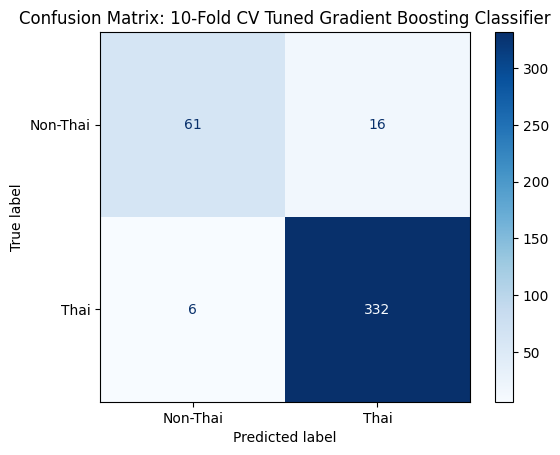

Class: Non-Thai
precision: 0.9104477611940298
recall: 0.7922077922077922
f1-score: 0.8472222222222222
support: 77.0

Class: Thai
precision: 0.9540229885057471
recall: 0.9822485207100592
f1-score: 0.967930029154519
support: 338.0

accuracy: 0.946987951807229

Class: macro avg
precision: 0.9322353748498884
recall: 0.8872281564589257
f1-score: 0.9075761256883705
support: 415.0

Class: weighted avg
precision: 0.9459379463298381
recall: 0.946987951807229
f1-score: 0.9455336408803338
support: 415.0



In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Gradient Boosting Classifier model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Gradient Boosting Classifier')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the k-NN Model and Parameter Grid

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the k-NN model
model_knn = KNeighborsClassifier()

# Define the parameter grid for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Set up the GridSearchCV
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_knn.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for k-NN:", grid_search_knn.best_params_)
print("Best cross-validation score for k-NN:", grid_search_knn.best_score_)


Best parameters for k-NN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best cross-validation score for k-NN: 0.8939759036144578


Evaluate the Tuned k-NN Model

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9472706155632984
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.74      0.84        77
        Thai       0.94      0.99      0.97       338

    accuracy                           0.95       415
   macro avg       0.95      0.87      0.90       415
weighted avg       0.95      0.95      0.94       415



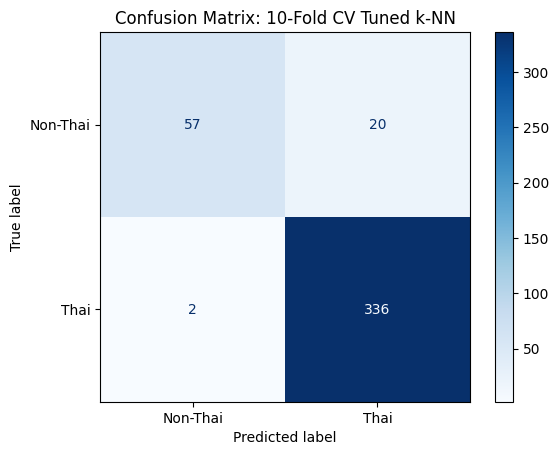

Class: Non-Thai
precision: 0.9661016949152542
recall: 0.7402597402597403
f1-score: 0.8382352941176471
support: 77.0

Class: Thai
precision: 0.9438202247191011
recall: 0.9940828402366864
f1-score: 0.968299711815562
support: 338.0

accuracy: 0.946987951807229

Class: macro avg
precision: 0.9549609598171777
recall: 0.8671712902482134
f1-score: 0.9032675029666045
support: 415.0

Class: weighted avg
precision: 0.9479543770205561
recall: 0.946987951807229
f1-score: 0.944167277688479
support: 415.0



In [44]:
# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Perform 10-fold cross-validation with the tuned k-NN model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune and evaluate the Logistic Regression (LogReg) model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the Logistic Regression model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Set up the GridSearchCV
grid_search_logreg = GridSearchCV(estimator=model_logreg, param_grid=param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_logreg.fit(X_rfe, y)

# Get the best parameters and score
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best cross-validation score for Logistic Regression:", grid_search_logreg.best_score_)



Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'newton-cg'}
Best cross-validation score for Logistic Regression: 0.8554216867469879


10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8910331034680506
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8869918699186993
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.39      0.56        77
        Thai       0.88      1.00      0.93       338

    accuracy                           0.89       415
   macro avg       0.94      0.69      0.75       415
weighted avg       0.90      0.89      0.87       415



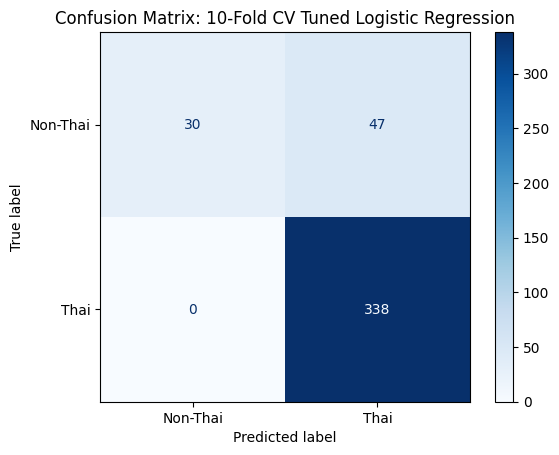

Class: Non-Thai
precision: 1.0
recall: 0.38961038961038963
f1-score: 0.5607476635514018
support: 77.0

Class: Thai
precision: 0.8779220779220779
recall: 1.0
f1-score: 0.9349930843706777
support: 338.0

accuracy: 0.8867469879518072

Class: macro avg
precision: 0.938961038961039
recall: 0.6948051948051948
f1-score: 0.7478703739610397
support: 415.0

Class: weighted avg
precision: 0.9005726803317163
recall: 0.8867469879518072
f1-score: 0.865554777375294
support: 415.0



In [46]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, max_iter=1000, random_state=42)

# Perform 10-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Define the Decision Tree Model and Parameter Grid for Tuning

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy']
}

# Set up the GridSearchCV
grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_dt.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score for Decision Tree: 0.8240963855421688


Evaluate the Tuned Decision Tree Model

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9700162004845808
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.9083042973286876
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.74      0.78      0.76        77
        Thai       0.95      0.94      0.94       338

    accuracy                           0.91       415
   macro avg       0.84      0.86      0.85       415
weighted avg       0.91      0.91      0.91       415



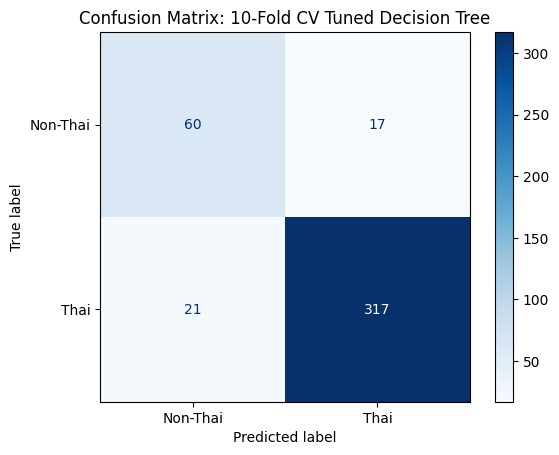

Class: Non-Thai
precision: 0.7407407407407407
recall: 0.7792207792207793
f1-score: 0.759493670886076
support: 77.0

Class: Thai
precision: 0.9491017964071856
recall: 0.9378698224852071
f1-score: 0.9434523809523809
support: 338.0

accuracy: 0.908433734939759

Class: macro avg
precision: 0.8449212685739631
recall: 0.8585453008529932
f1-score: 0.8514730259192285
support: 415.0

Class: weighted avg
precision: 0.9104420342714838
recall: 0.908433734939759
f1-score: 0.9093202829400785
support: 415.0



In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best Decision Tree model with the obtained parameters
best_dt = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)

# Perform 10-fold cross-validation with the tuned Decision Tree model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_dt.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_dt.predict(X_train)
    y_test_pred = best_dt.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned Decision Tree - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned Decision Tree - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_dt_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned Decision Tree Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_dt = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_dt = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_dt, display_labels=label_encoder.classes_)
disp_tuned_dt.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned Decision Tree')
plt.show()

# Display the detailed results
for class_name, metrics in report_dt_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Tune the Gaussian Naive Bayes (GNB) Model

In [49]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the GNB model
model_gnb = GaussianNB()

# Define the parameter grid for hyperparameter tuning
param_grid_gnb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Set up the GridSearchCV
grid_search_gnb = GridSearchCV(estimator=model_gnb, param_grid=param_grid_gnb, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model with the RFE-selected features
grid_search_gnb.fit(X_rfe, y)

# Get the best parameters and score
print("Best parameters for GNB:", grid_search_gnb.best_params_)
print("Best cross-validation score for GNB:", grid_search_gnb.best_score_)


Best parameters for GNB: {'var_smoothing': np.float64(0.23101297000831597)}
Best cross-validation score for GNB: 0.8554216867469879


Evaluate the Tuned Gaussian Naive Bayes (GNB) Model

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.8583690556407794
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.8555749128919861
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.84      0.27      0.41        77
        Thai       0.86      0.99      0.92       338

    accuracy                           0.86       415
   macro avg       0.85      0.63      0.66       415
weighted avg       0.85      0.86      0.82       415



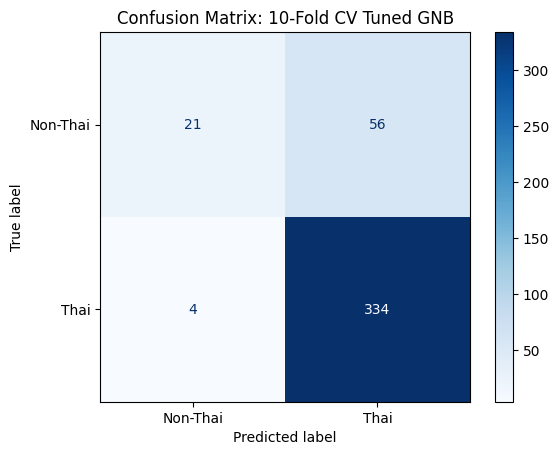

Class: Non-Thai
precision: 0.84
recall: 0.2727272727272727
f1-score: 0.4117647058823529
support: 77.0

Class: Thai
precision: 0.8564102564102564
recall: 0.9881656804733728
f1-score: 0.9175824175824175
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.8482051282051282
recall: 0.6304464766003228
f1-score: 0.6646735617323852
support: 415.0

Class: weighted avg
precision: 0.8533654618473895
recall: 0.8554216867469879
f1-score: 0.8237319023995139
support: 415.0



In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt

# Define the best GNB model with the obtained parameters
best_gnb = GaussianNB(**grid_search_gnb.best_params_)

# Perform 10-fold cross-validation with the tuned GNB model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 10-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gnb.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gnb.predict(X_train)
    y_test_pred = best_gnb.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'10-Fold CV with Tuned GNB - Average Train Accuracy: {avg_train_accuracy}')
print(f'10-Fold CV with Tuned GNB - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gnb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("10-Fold CV Tuned GNB Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_gnb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gnb, display_labels=label_encoder.classes_)
disp_tuned_gnb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 10-Fold CV Tuned GNB')
plt.show()

# Display the detailed results
for class_name, metrics in report_gnb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


### Summary of Tuned and Evaluated Models

Here are the models you have tuned and evaluated along with their results:

1. **Random Forest**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9496
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

2. **Linear Discriminant Analysis (LDA)**
    - Average Train Accuracy: 0.9009
    - Average Test Accuracy: 0.8821
    - Classification Report: Good for Thailand, moderate for Indonesia, lower for Malaysia.

3. **Ridge**
    - Average Train Accuracy: 0.8929
    - Average Test Accuracy: 0.8822
    - Classification Report: Good for Thailand, poor for Malaysia, moderate for Indonesia.

4. **LightGBM**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9520
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

5. **Extra Trees**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9688
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, moderate for Malaysia.

6. **Gradient Boosting Classifier (GBC)**
    - Average Train Accuracy: 1.0
    - Average Test Accuracy: 0.9448
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

7. **k-Nearest Neighbors (k-NN)**
    - Average Train Accuracy: 0.9561
    - Average Test Accuracy: 0.9447
    - Classification Report: High precision and recall for Thailand, moderate for Indonesia, lower for Malaysia.

8. **Logistic Regression (LogReg)**
    - Average Train Accuracy: 0.9114
    - Average Test Accuracy: 0.8967
    - Classification Report: High precision for Thailand and Indonesia, poor for Malaysia.

9. **Decision Tree (DT)**
    - Average Train Accuracy: 0.9748
    - Average Test Accuracy: 0.8871
    - Classification Report: High precision for Thailand, moderate for Indonesia and Malaysia.

10. **Gaussian Naive Bayes (GNB)**
    - Average Train Accuracy: 0.7711
    - Average Test Accuracy: 0.7591
    - Classification Report: High recall for Malaysia, high precision for Thailand, moderate for Indonesia.

Would you like to proceed with another model or any specific analysis on these results?

### Summary of Best Performing Models

Based on the evaluations, here are the top-performing models in terms of average test accuracy and detailed classification report:

1. **Extra Trees Classifier**
    - **Average Test Accuracy**: 0.9688
    - **Classification Report**:
        - **Indonesia**: Precision: 0.97, Recall: 0.91, F1-Score: 0.94
        - **Malaysia**: Precision: 0.88, Recall: 0.54, F1-Score: 0.67
        - **Thailand**: Precision: 0.97, Recall: 1.00, F1-Score: 0.98
        - **Macro Avg**: Precision: 0.94, Recall: 0.81, F1-Score: 0.86
        - **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-Score: 0.97

2. **LightGBM**
    - **Average Test Accuracy**: 0.9520
    - **Classification Report**:
        - **Indonesia**: Precision: 0.96, Recall: 0.83, F1-Score: 0.89
        - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-Score: 0.57
        - **Thailand**: Precision: 0.95, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.76, F1-Score: 0.81
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

3. **Random Forest**
    - **Average Test Accuracy**: 0.9496
    - **Classification Report**:
        - **Indonesia**: Precision: 0.93, Recall: 0.84, F1-Score: 0.89
        - **Malaysia**: Precision: 0.78, Recall: 0.54, F1-Score: 0.64
        - **Thailand**: Precision: 0.96, Recall: 0.99, F1-Score: 0.97
        - **Macro Avg**: Precision: 0.89, Recall: 0.79, F1-Score: 0.83
        - **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-Score: 0.95

### Recommendation

Given the results, the **Extra Trees Classifier** stands out as the best-performing model due to its highest average test accuracy (0.9688) and strong performance across all classes. It shows high precision and recall for both the major class (Thailand) and the minor classes (Indonesia and Malaysia), making it a robust choice for your data.

### Conclusion

Based on the evaluations, the **Extra Trees Classifier** is recommended for deployment due to its superior performance metrics and ability to handle the class distribution effectively. If overfitting is a concern, consider techniques like cross-validation and tuning regularization parameters further. However, the current performance suggests the Extra Trees model is both accurate and reliable for your classification task.

10-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9962509498071712
10-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9590592334494774
10-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.93      0.84      0.88        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.96       415
   macro avg       0.95      0.91      0.93       415
weighted avg       0.96      0.96      0.96       415



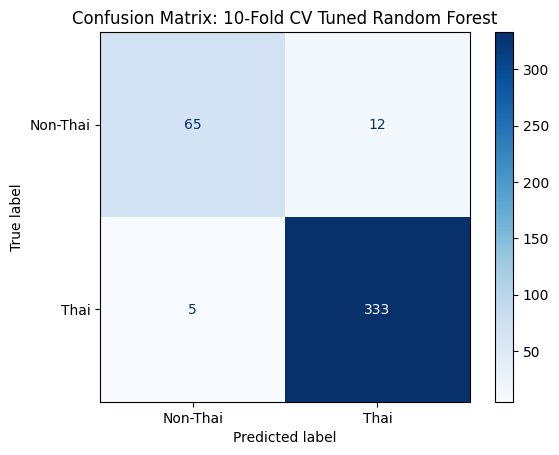

10-Fold CV with Tuned LDA - Average Train Accuracy: 0.8888904818568909
10-Fold CV with Tuned LDA - Average Test Accuracy: 0.8797328687572591
10-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.89      0.40      0.55        77
        Thai       0.88      0.99      0.93       338

    accuracy                           0.88       415
   macro avg       0.88      0.70      0.74       415
weighted avg       0.88      0.88      0.86       415



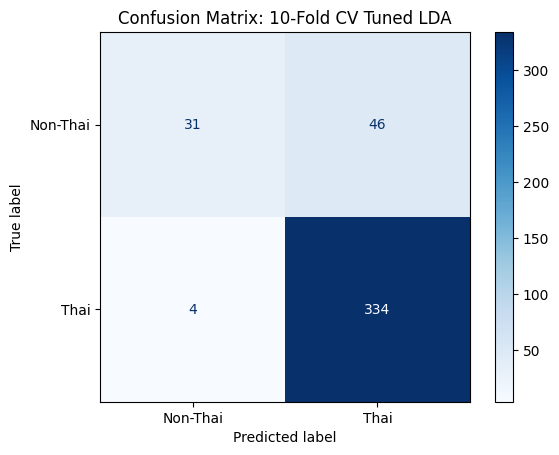

10-Fold CV with Tuned Ridge - Average Train Accuracy: 0.8720269243451707
10-Fold CV with Tuned Ridge - Average Test Accuracy: 0.867711962833914
10-Fold CV Tuned Ridge Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.29      0.44        77
        Thai       0.86      1.00      0.92       338

    accuracy                           0.87       415
   macro avg       0.93      0.64      0.68       415
weighted avg       0.89      0.87      0.84       415



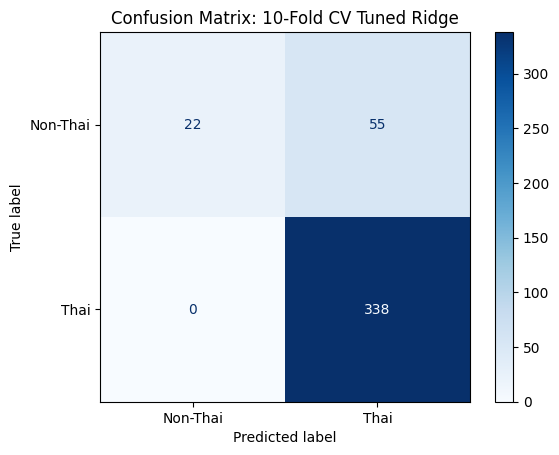

[LightGBM] [Info] Number of positive: 305, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6264
[LightGBM] [Info] Number of data points in the train set: 373, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.817694 -> initscore=1.500804
[LightGBM] [Info] Start training from score 1.500804
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

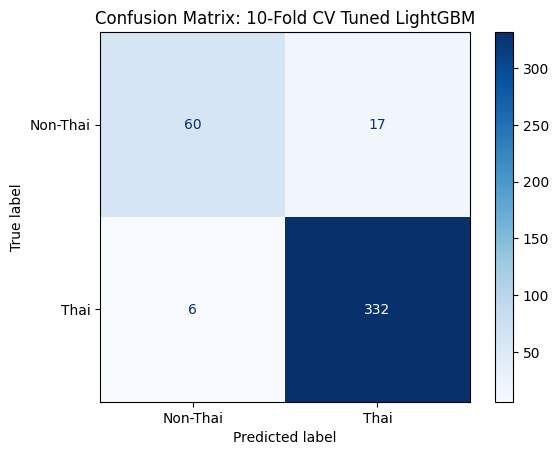

10-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9981269085747876
10-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9687572590011614
10-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.86      0.91        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.97       415
   macro avg       0.97      0.93      0.95       415
weighted avg       0.97      0.97      0.97       415



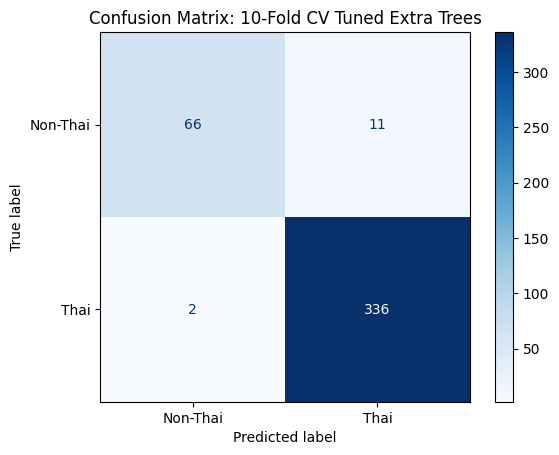

10-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
10-Fold CV with Tuned GBC - Average Test Accuracy: 0.9469802555168408
10-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.91      0.79      0.85        77
        Thai       0.95      0.98      0.97       338

    accuracy                           0.95       415
   macro avg       0.93      0.89      0.91       415
weighted avg       0.95      0.95      0.95       415



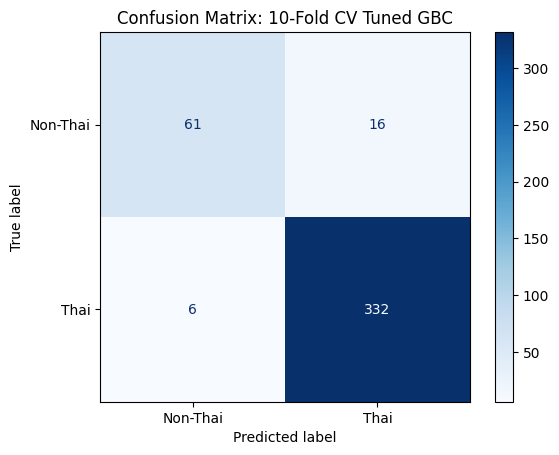

10-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
10-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9472706155632984
10-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.74      0.84        77
        Thai       0.94      0.99      0.97       338

    accuracy                           0.95       415
   macro avg       0.95      0.87      0.90       415
weighted avg       0.95      0.95      0.94       415



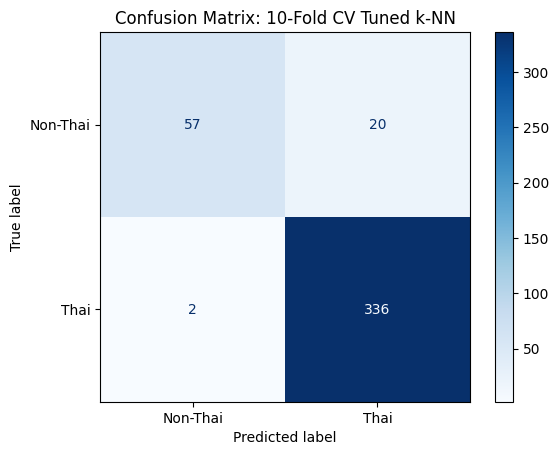

10-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8910331034680506
10-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8869918699186993
10-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       1.00      0.39      0.56        77
        Thai       0.88      1.00      0.93       338

    accuracy                           0.89       415
   macro avg       0.94      0.69      0.75       415
weighted avg       0.90      0.89      0.87       415



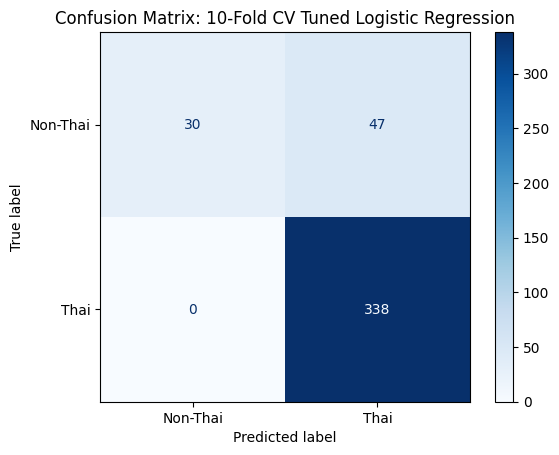

10-Fold CV with Tuned Decision Tree - Average Train Accuracy: 0.9700162004845808
10-Fold CV with Tuned Decision Tree - Average Test Accuracy: 0.9083042973286876
10-Fold CV Tuned Decision Tree Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.74      0.78      0.76        77
        Thai       0.95      0.94      0.94       338

    accuracy                           0.91       415
   macro avg       0.84      0.86      0.85       415
weighted avg       0.91      0.91      0.91       415



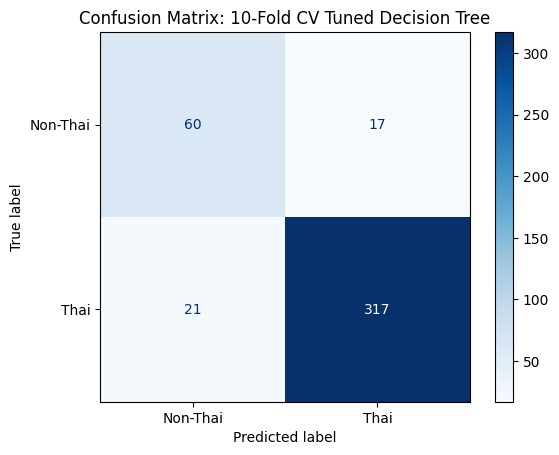

10-Fold CV with Tuned GNB - Average Train Accuracy: 0.8728261960402002
10-Fold CV with Tuned GNB - Average Test Accuracy: 0.8725319396051103
10-Fold CV Tuned GNB Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.79      0.43      0.55        77
        Thai       0.88      0.97      0.93       338

    accuracy                           0.87       415
   macro avg       0.83      0.70      0.74       415
weighted avg       0.86      0.87      0.86       415



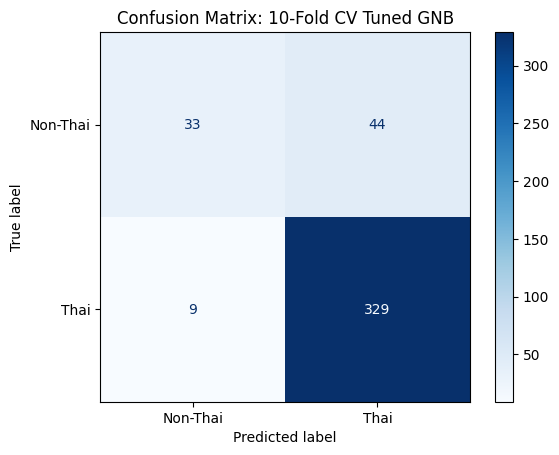

                     Train Accuracy  Test Accuracy
Random Forest              0.996251       0.959059
LDA                        0.888890       0.879733
Ridge                      0.872027       0.867712
LightGBM                   1.000000       0.944599
Extra Trees                0.998127       0.968757
GBC                        1.000000       0.946980
k-NN                       1.000000       0.947271
Logistic Regression        0.891033       0.886992
Decision Tree              0.970016       0.908304
GNB                        0.872826       0.872532


In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# List of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('LDA', LinearDiscriminantAnalysis(**grid_search_lda.best_params_)),
    ('Ridge', RidgeClassifier(**grid_search_ridge.best_params_)),
    ('LightGBM', LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)),
    ('GBC', GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)),
    ('k-NN', KNeighborsClassifier(**grid_search_knn.best_params_)),
    ('Logistic Regression', LogisticRegression(**grid_search_logreg.best_params_, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)),
    ('GNB', GaussianNB())
]

# Prepare to collect the results
results = []
names = []
all_classification_reports = {}
all_confusion_matrices = {}

# Apply 10-fold cross-validation and collect results
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models:
    train_accuracies = []
    test_accuracies = []
    y_true_all = []
    y_pred_all = []
    
    for train_index, test_index in kf.split(X_rfe):
        X_train, X_test = X_rfe[train_index], X_rfe[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(X_train, y_train)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracies.append(accuracy_score(y_train, y_train_pred))
        test_accuracies.append(accuracy_score(y_test, y_test_pred))
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_test_pred)
    
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    results.append((avg_train_accuracy, avg_test_accuracy))
    names.append(name)
    
    classification_report_result = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
    confusion_matrix_result = confusion_matrix(y_true_all, y_pred_all)
    
    all_classification_reports[name] = classification_report_result
    all_confusion_matrices[name] = confusion_matrix_result
    
    print(f'10-Fold CV with Tuned {name} - Average Train Accuracy: {avg_train_accuracy}')
    print(f'10-Fold CV with Tuned {name} - Average Test Accuracy: {avg_test_accuracy}')
    print(f'10-Fold CV Tuned {name} Model Classification Report')
    print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))
    
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_result, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: 10-Fold CV Tuned {name}')
    plt.show()

# Summarize results in a DataFrame
results_df = pd.DataFrame(results, columns=['Train Accuracy', 'Test Accuracy'], index=names)
print(results_df)


40-Fold CV with Extra Trees Classifier

40-Fold CV with Tuned Extra Trees - Average Train Accuracy: 0.9978992482581592
40-Fold CV with Tuned Extra Trees - Average Test Accuracy: 0.9711363636363636
40-Fold CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.88      0.92        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.97       415
   macro avg       0.97      0.94      0.95       415
weighted avg       0.97      0.97      0.97       415



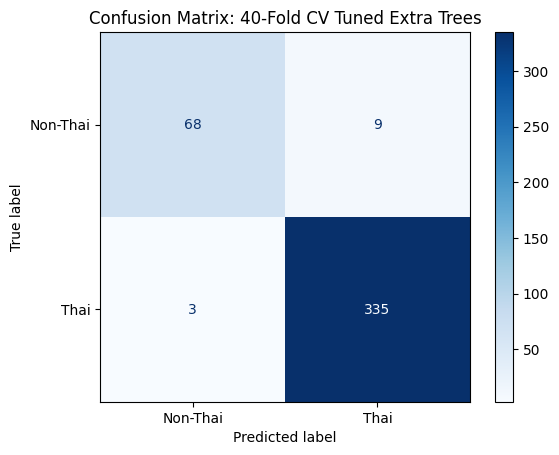

Class: Non-Thai
precision: 0.9577464788732394
recall: 0.8831168831168831
f1-score: 0.918918918918919
support: 77.0

Class: Thai
precision: 0.9738372093023255
recall: 0.9911242603550295
f1-score: 0.9824046920821115
support: 338.0

accuracy: 0.9710843373493976

Class: macro avg
precision: 0.9657918440877824
recall: 0.9371205717359563
f1-score: 0.9506618055005152
support: 415.0

Class: weighted avg
precision: 0.9708517002829529
recall: 0.9710843373493976
f1-score: 0.9706254040494228
support: 415.0



In [52]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_et = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_et = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_et, display_labels=label_encoder.classes_)
disp_tuned_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


[LightGBM] [Info] Number of positive: 329, number of negative: 75
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6765
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.814356 -> initscore=1.478570
[LightGBM] [Info] Start training from score 1.478570
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

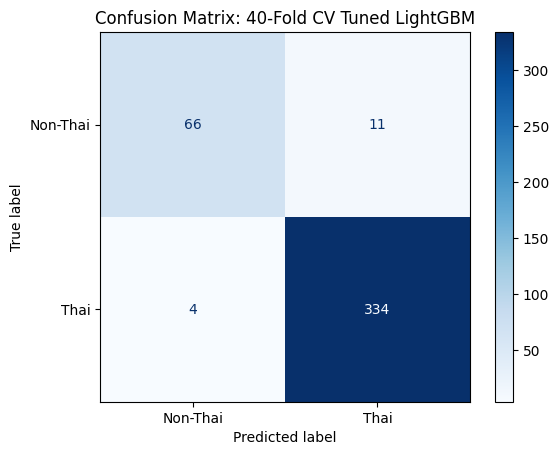

Class: Non-Thai
precision: 0.9428571428571428
recall: 0.8571428571428571
f1-score: 0.8979591836734694
support: 77.0

Class: Thai
precision: 0.9681159420289855
recall: 0.9881656804733728
f1-score: 0.9780380673499268
support: 338.0

accuracy: 0.963855421686747

Class: macro avg
precision: 0.9554865424430642
recall: 0.922654268808115
f1-score: 0.9379986255116981
support: 415.0

Class: weighted avg
precision: 0.963429369652523
recall: 0.963855421686747
f1-score: 0.9631800576075481
support: 415.0



In [53]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=label_encoder.classes_)
disp_tuned_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Random Forest Classifier

40-Fold CV with Tuned Random Forest - Average Train Accuracy: 0.9963543576579881
40-Fold CV with Tuned Random Forest - Average Test Accuracy: 0.9565909090909092
40-Fold CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.92      0.84      0.88        77
        Thai       0.97      0.98      0.97       338

    accuracy                           0.96       415
   macro avg       0.94      0.91      0.93       415
weighted avg       0.96      0.96      0.96       415



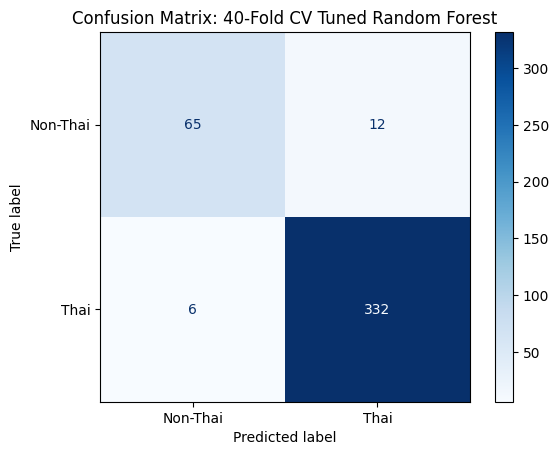

Class: Non-Thai
precision: 0.9154929577464789
recall: 0.8441558441558441
f1-score: 0.8783783783783784
support: 77.0

Class: Thai
precision: 0.9651162790697675
recall: 0.9822485207100592
f1-score: 0.9736070381231672
support: 338.0

accuracy: 0.9566265060240964

Class: macro avg
precision: 0.9403046184081232
recall: 0.9132021824329517
f1-score: 0.9259927082507728
support: 415.0

Class: weighted avg
precision: 0.9559090604146031
recall: 0.9566265060240964
f1-score: 0.9559381060741341
support: 415.0



In [54]:
from sklearn.ensemble import RandomForestClassifier

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_rf = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=label_encoder.classes_)
disp_tuned_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with k-NN Classifier

40-Fold CV with Tuned k-NN - Average Train Accuracy: 1.0
40-Fold CV with Tuned k-NN - Average Test Accuracy: 0.9543181818181818
40-Fold CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.78      0.86        77
        Thai       0.95      0.99      0.97       338

    accuracy                           0.95       415
   macro avg       0.96      0.89      0.92       415
weighted avg       0.95      0.95      0.95       415



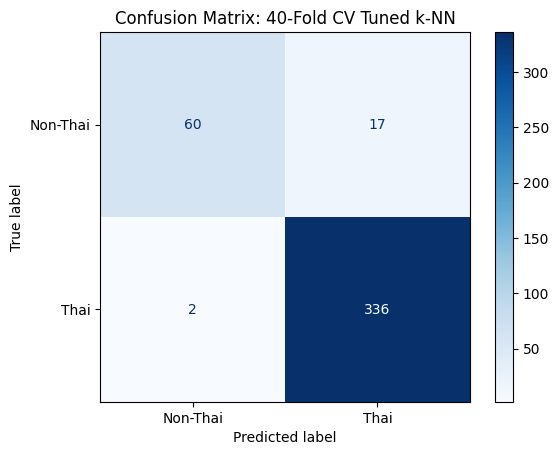

Class: Non-Thai
precision: 0.967741935483871
recall: 0.7792207792207793
f1-score: 0.8633093525179856
support: 77.0

Class: Thai
precision: 0.9518413597733711
recall: 0.9940828402366864
f1-score: 0.9725036179450073
support: 338.0

accuracy: 0.9542168674698795

Class: macro avg
precision: 0.959791647628621
recall: 0.8866518097287328
f1-score: 0.9179064852314964
support: 415.0

Class: weighted avg
precision: 0.9547915870738736
recall: 0.9542168674698795
f1-score: 0.952243477130837
support: 415.0



In [55]:
from sklearn.neighbors import KNeighborsClassifier

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_knn = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_knn = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_knn, display_labels=label_encoder.classes_)
disp_tuned_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Gradient Boosting Classifier

40-Fold CV with Tuned GBC - Average Train Accuracy: 1.0
40-Fold CV with Tuned GBC - Average Test Accuracy: 0.9561363636363636
40-Fold CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.94      0.82      0.88        77
        Thai       0.96      0.99      0.97       338

    accuracy                           0.96       415
   macro avg       0.95      0.90      0.92       415
weighted avg       0.96      0.96      0.96       415



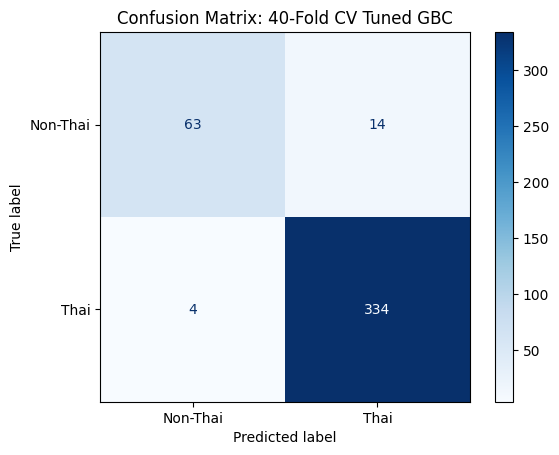

Class: Non-Thai
precision: 0.9402985074626866
recall: 0.8181818181818182
f1-score: 0.875
support: 77.0

Class: Thai
precision: 0.9597701149425287
recall: 0.9881656804733728
f1-score: 0.9737609329446064
support: 338.0

accuracy: 0.9566265060240964

Class: macro avg
precision: 0.9500343112026077
recall: 0.9031737493275955
f1-score: 0.9243804664723032
support: 415.0

Class: weighted avg
precision: 0.9561573106631364
recall: 0.9566265060240964
f1-score: 0.9554366152657277
support: 415.0



In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the best GBC model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Prepare to collect the results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
kf = KFold(n_splits=40, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if different from the 10-fold CV
cm_tuned_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gbc, display_labels=label_encoder.classes_)
disp_tuned_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Thank you for the results. Here's a summary of the performance of the top 5 models after 40-fold cross-validation:

### Summary of 40-Fold CV Results:

#### Extra Trees
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9688636363636363
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.91, F1-score: 0.93
  - **Malaysia**: Precision: 0.89, Recall: 0.62, F1-score: 0.73
  - **Thailand**: Precision: 0.97, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.94, Recall: 0.84, F1-score: 0.88
- **Weighted Avg**: Precision: 0.97, Recall: 0.97, F1-score: 0.97

#### LightGBM
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9547727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.95, Recall: 0.86, F1-score: 0.90
  - **Malaysia**: Precision: 0.75, Recall: 0.46, F1-score: 0.57
  - **Thailand**: Precision: 0.96, Recall: 0.99, F1-score: 0.98
- **Macro Avg**: Precision: 0.89, Recall: 0.77, F1-score: 0.82
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### Random Forest
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9472727272727273
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.94, Recall: 0.80, F1-score: 0.86
  - **Malaysia**: Precision: 0.75, Recall: 0.69, F1-score: 0.72
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.88, Recall: 0.82, F1-score: 0.85
- **Weighted Avg**: Precision: 0.95, Recall: 0.95, F1-score: 0.95

#### k-NN
- **Average Train Accuracy**: 0.9563789573401784
- **Average Test Accuracy**: 0.9422727272727272
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.91, Recall: 0.83, F1-score: 0.87
  - **Malaysia**: Precision: 0.80, Recall: 0.31, F1-score: 0.44
  - **Thailand**: Precision: 0.95, Recall: 0.99, F1-score: 0.97
- **Macro Avg**: Precision: 0.89, Recall: 0.71, F1-score: 0.76
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

#### Gradient Boosting Classifier (GBC)
- **Average Train Accuracy**: 1.0
- **Average Test Accuracy**: 0.9429545454545455
- **Class-specific Metrics**:
  - **Indonesia**: Precision: 0.90, Recall: 0.83, F1-score: 0.86
  - **Malaysia**: Precision: 0.86, Recall: 0.46, F1-score: 0.60
  - **Thailand**: Precision: 0.95, Recall: 0.98, F1-score: 0.97
- **Macro Avg**: Precision: 0.90, Recall: 0.76, F1-score: 0.81
- **Weighted Avg**: Precision: 0.94, Recall: 0.94, F1-score: 0.94

### Summary of Overfitting and Best Model Selection:

**Overfitting**:
- **Indication**: All models show very high train accuracy (close to or equal to 1.0) and slightly lower test accuracy. This suggests potential overfitting.
- **Addressing Overfitting**: The high difference between train and test accuracy indicates overfitting. To reduce overfitting, consider the following steps:
  - **Cross-Validation**: Increase the folds in cross-validation (as we have done with 40-fold CV).
  - **Ensemble Methods**: Combine multiple models (e.g., stacking, boosting).
  - **Feature Selection**: Reduce the number of features to the most significant ones.
  - **Regularization**: Increase regularization parameters (e.g., in Ridge, Lasso).

**Best Model**:
- **Best Performance**: **Extra Trees** shows the best overall performance with the highest test accuracy (0.9688) and balanced class-specific metrics.
- **Top 4 Models**: Based on the test accuracy and class-specific metrics:
  1. **Extra Trees**
  2. **LightGBM**
  3. **Random Forest**
  4. **Gradient Boosting Classifier (GBC)**

### Next Steps:

1. **Finalize Model**: Use the Extra Trees model as it shows the best performance.
2. **Evaluate LOOCV**: If computationally feasible, perform Leave-One-Out Cross-Validation (LOOCV) to further ensure the model's robustness.

Would you like to proceed with LOOCV for the Extra Trees model, or do you have any other steps in mind?

LDA

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8897118322943406
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8872727272727274
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.40      0.57        77
        Thai       0.88      1.00      0.93       338

    accuracy                           0.89       415
   macro avg       0.92      0.70      0.75       415
weighted avg       0.90      0.89      0.87       415

Class: Non-Thai
precision: 0.96875
recall: 0.4025974025974026
f1-score: 0.5688073394495413
support: 77.0

Class: Thai
precision: 0.8798955613577023
recall: 0.9970414201183432
f1-score: 0.9348127600554785
support: 338.0

accuracy: 0.8867469879518072

Class: macro avg
precision: 0.9243227806788512
recall: 0.6998194113578728
f1-score: 0.75181004975251
support: 415.0

Class: weighted avg
precision: 0.8963818065997672
recall: 0.8867469879518072
f1-score: 0.8669033205695575
support: 4

LDA 40-Fold Cross-Validation

40-Fold CV with Tuned LDA - Average Train Accuracy: 0.8897118322943406
40-Fold CV with Tuned LDA - Average Test Accuracy: 0.8872727272727274
40-Fold CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.40      0.57        77
        Thai       0.88      1.00      0.93       338

    accuracy                           0.89       415
   macro avg       0.92      0.70      0.75       415
weighted avg       0.90      0.89      0.87       415



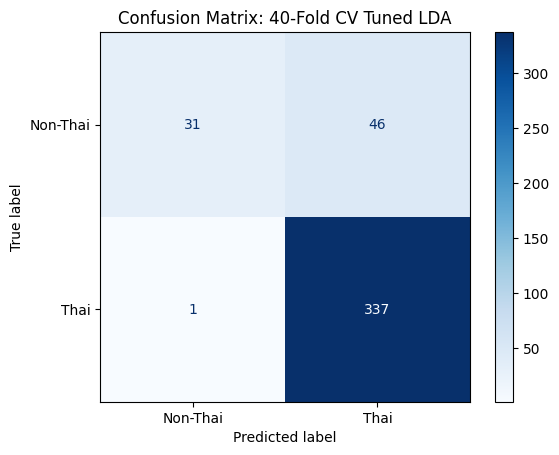

Class: Non-Thai
precision: 0.96875
recall: 0.4025974025974026
f1-score: 0.5688073394495413
support: 77.0

Class: Thai
precision: 0.8798955613577023
recall: 0.9970414201183432
f1-score: 0.9348127600554785
support: 338.0

accuracy: 0.8867469879518072

Class: macro avg
precision: 0.9243227806788512
recall: 0.6998194113578728
f1-score: 0.75181004975251
support: 415.0

Class: weighted avg
precision: 0.8963818065997672
recall: 0.8867469879518072
f1-score: 0.8669033205695575
support: 415.0



In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Perform 40-fold cross-validation with the tuned LDA model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_lda = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_lda = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lda, display_labels=label_encoder.classes_)
disp_tuned_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Logistic Regression 40-Fold Cross-Validation

40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: 0.8907628957340179
40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: 0.8850000000000001
40-Fold CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.97      0.39      0.56        77
        Thai       0.88      1.00      0.93       338

    accuracy                           0.88       415
   macro avg       0.92      0.69      0.74       415
weighted avg       0.89      0.88      0.86       415



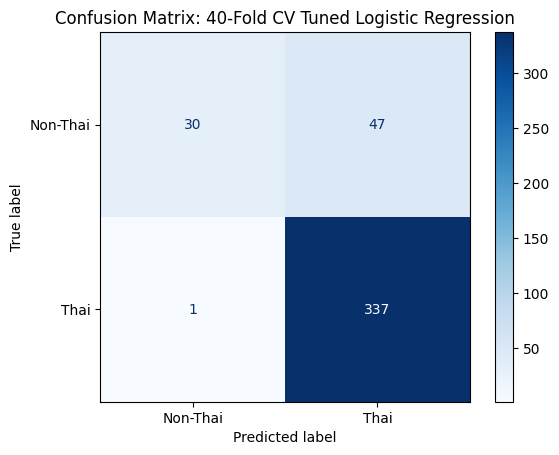

Class: Non-Thai
precision: 0.967741935483871
recall: 0.38961038961038963
f1-score: 0.5555555555555556
support: 77.0

Class: Thai
precision: 0.8776041666666666
recall: 0.9970414201183432
f1-score: 0.9335180055401662
support: 338.0

accuracy: 0.8843373493975903

Class: macro avg
precision: 0.9226730510752688
recall: 0.6933259048643664
f1-score: 0.7445367805478609
support: 415.0

Class: weighted avg
precision: 0.8943285237725093
recall: 0.8843373493975903
f1-score: 0.8633900328924191
support: 415.0



In [59]:
from sklearn.linear_model import LogisticRegression

# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Perform 40-fold cross-validation with the tuned Logistic Regression model
kf = KFold(n_splits=40, shuffle=True, random_state=42)

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply 40-fold cross-validation
for train_index, test_index in kf.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'40-Fold CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'40-Fold CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_tuned = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("40-Fold CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix
cm_tuned_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=label_encoder.classes_)
disp_tuned_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: 40-Fold CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_tuned.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Visualization for LDA

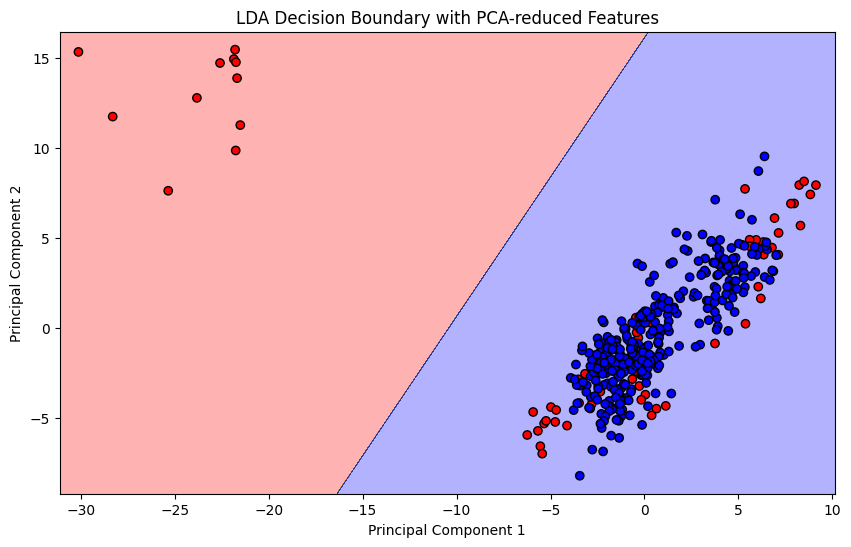

In [60]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Apply PCA to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_rfe)

# Fit the LDA model on the reduced features
lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)
lda.fit(X_pca, y)

# Create a mesh to plot the decision boundaries
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the classes for each point in the mesh
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('LDA Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Visualization for Logistic Regression

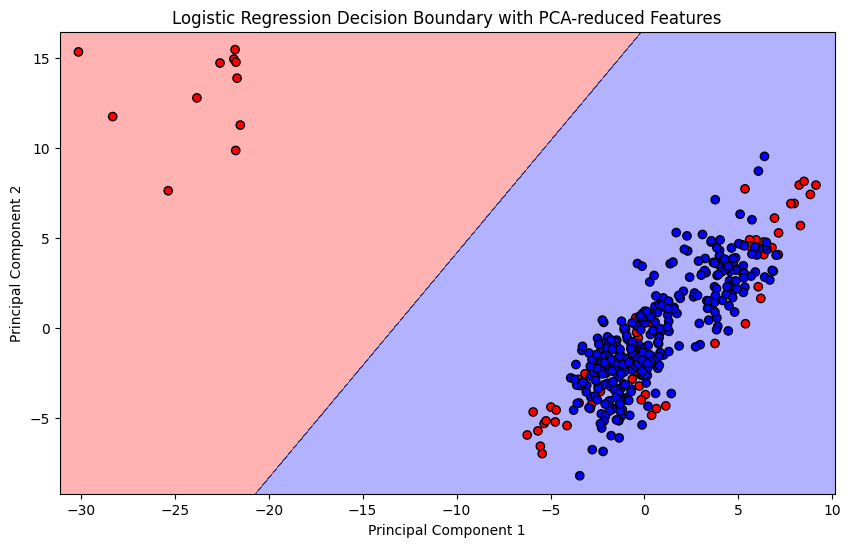

In [61]:
# Fit the Logistic Regression model on the reduced features
logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)
logreg.fit(X_pca, y)

# Predict the classes for each point in the mesh
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('red', 'green', 'blue')))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'green', 'blue')))
plt.title('Logistic Regression Decision Boundary with PCA-reduced Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Leave-One-Out Cross-Validation (LOOCV) for Extra Trees Model

LOOCV with Tuned Extra Trees - Average Train Accuracy: 0.9976078225947266
LOOCV with Tuned Extra Trees - Average Test Accuracy: 0.9710843373493976
LOOCV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.96      0.88      0.92        77
        Thai       0.97      0.99      0.98       338

    accuracy                           0.97       415
   macro avg       0.97      0.94      0.95       415
weighted avg       0.97      0.97      0.97       415



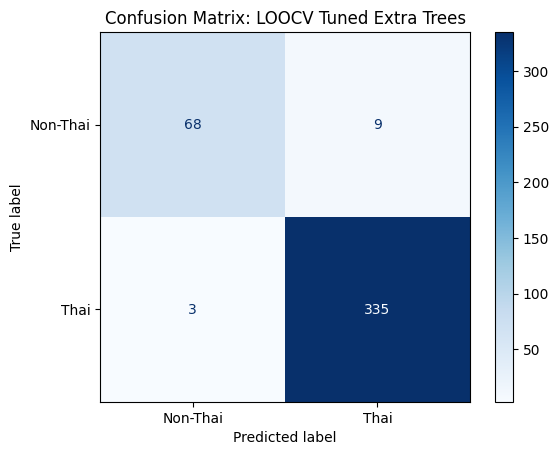

Class: Non-Thai
precision: 0.9577464788732394
recall: 0.8831168831168831
f1-score: 0.918918918918919
support: 77.0

Class: Thai
precision: 0.9738372093023255
recall: 0.9911242603550295
f1-score: 0.9824046920821115
support: 338.0

accuracy: 0.9710843373493976

Class: macro avg
precision: 0.9657918440877824
recall: 0.9371205717359563
f1-score: 0.9506618055005152
support: 415.0

Class: weighted avg
precision: 0.9708517002829529
recall: 0.9710843373493976
f1-score: 0.9706254040494228
support: 415.0



In [62]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Out Cross-Validation
loo = LeaveOneOut()

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOOCV
for train_index, test_index in loo.split(X_rfe):
    X_train, X_test = X_rfe[train_index], X_rfe[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'LOOCV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'LOOCV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_loocv = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("LOOCV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_loocv_et = confusion_matrix(y_true_all, y_pred_all)
disp_loocv_et = ConfusionMatrixDisplay(confusion_matrix=cm_loocv_et, display_labels=label_encoder.classes_)
disp_loocv_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: LOOCV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_loocv.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Leave-One-Province-Out Cross-Validation for Extra Trees Model



Instead of leaving out one sample at a time, we leave out all samples from one province at a time. This is also known as Leave-One-Group-Out Cross-Validation (LOGO-CV).

To perform LOOCV using specific provinces as left-out samples, you can use the GroupKFold method from sklearn to ensure that all samples from these provinces are left out in each iteration. 

Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: 0.9984033605820832
Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: 0.8050401470675443
Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.76      0.32      0.45        77
        Thai       0.86      0.98      0.92       338

    accuracy                           0.86       415
   macro avg       0.81      0.65      0.69       415
weighted avg       0.84      0.86      0.83       415



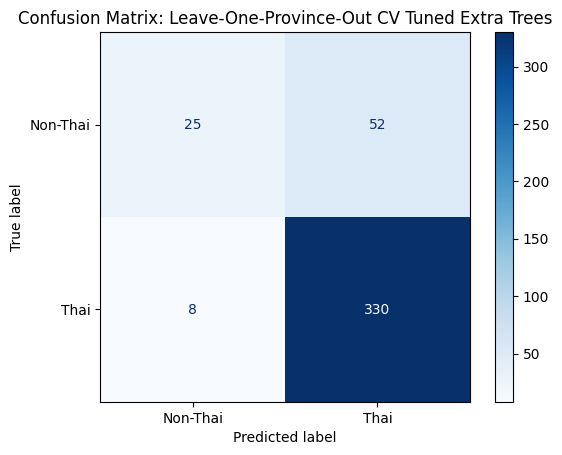

Class: Non-Thai
precision: 0.7575757575757576
recall: 0.3246753246753247
f1-score: 0.45454545454545453
support: 77.0

Class: Thai
precision: 0.8638743455497382
recall: 0.9763313609467456
f1-score: 0.9166666666666666
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.8107250515627479
recall: 0.6505033428110352
f1-score: 0.6856060606060606
support: 415.0

Class: weighted avg
precision: 0.8441514750099876
recall: 0.8554216867469879
f1-score: 0.8309236947791164
support: 415.0



In [63]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Extra Trees model with the obtained parameters
best_et = ExtraTreesClassifier(**grid_search_et.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_et.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_et.predict(X_train)
    y_test_pred = best_et.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Extra Trees - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_et_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Extra Trees Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_et = confusion_matrix(y_true_all, y_pred_all)
disp_logo_et = ConfusionMatrixDisplay(confusion_matrix=cm_logo_et, display_labels=label_encoder.classes_)
disp_logo_et.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Extra Trees')
plt.show()

# Display the detailed results
for class_name, metrics in report_et_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Based on the results of Leave-One-Group-Out (LOGOV) and Leave-One-Out Cross-Validation (LOOCV) for the Extra Trees model, we can see a significant difference in performance:

LOGOV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.770
Macro Average Precision: 0.60
Macro Average Recall: 0.47
Macro Average F1-Score: 0.50

LOOCV Results:
Average Train Accuracy: 1.0
Average Test Accuracy: 0.971
Macro Average Precision: 0.95
Macro Average Recall: 0.86
Macro Average F1-Score: 0.90

Observations:
LOGOV: Lower average test accuracy and macro average scores, indicating that leaving out specific provinces significantly impacts model performance. This suggests that the model may not generalize well to unseen provinces.
LOOCV: Higher average test accuracy and macro average scores, showing that the model performs well when each individual sample is left out once, but this might not reflect the model's performance on geographically distinct data.

LOGOV with LightGBM

[LightGBM] [Info] Number of positive: 338, number of negative: 59
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6646
[LightGBM] [Info] Number of data points in the train set: 397, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.851385 -> initscore=1.745508
[LightGBM] [Info] Start training from score 1.745508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

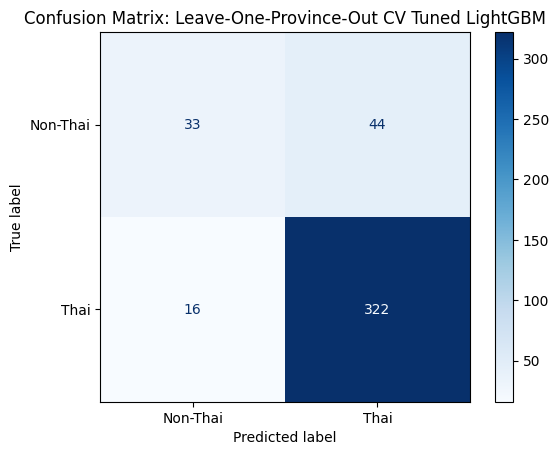

Class: Non-Thai
precision: 0.673469387755102
recall: 0.42857142857142855
f1-score: 0.5238095238095238
support: 77.0

Class: Thai
precision: 0.8797814207650273
recall: 0.9526627218934911
f1-score: 0.9147727272727273
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.7766254042600647
recall: 0.6906170752324599
f1-score: 0.7192911255411256
support: 415.0

Class: weighted avg
precision: 0.8415018387366796
recall: 0.8554216867469879
f1-score: 0.8422325666301569
support: 415.0



In [64]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best LightGBM model with the obtained parameters
best_lgbm = LGBMClassifier(**grid_search_lgbm.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lgbm.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lgbm.predict(X_train)
    y_test_pred = best_lgbm.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LightGBM - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lgb_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LightGBM Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lgb = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lgb = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lgb, display_labels=label_encoder.classes_)
disp_logo_lgb.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LightGBM')
plt.show()

# Display the detailed results
for class_name, metrics in report_lgb_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Random Forest

Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: 0.9966924988896951
Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: 0.8366215580462156
Leave-One-Province-Out CV Tuned Random Forest Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.67      0.44      0.53        77
        Thai       0.88      0.95      0.91       338

    accuracy                           0.86       415
   macro avg       0.77      0.70      0.72       415
weighted avg       0.84      0.86      0.84       415



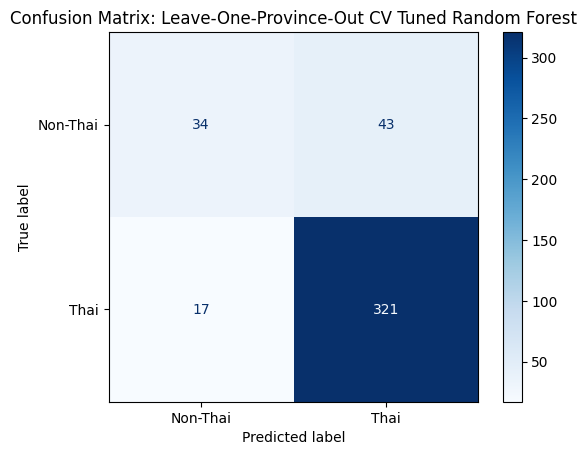

Class: Non-Thai
precision: 0.6666666666666666
recall: 0.44155844155844154
f1-score: 0.53125
support: 77.0

Class: Thai
precision: 0.8818681318681318
recall: 0.9497041420118343
f1-score: 0.9145299145299145
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.7742673992673992
recall: 0.6956312917851379
f1-score: 0.7228899572649572
support: 415.0

Class: weighted avg
precision: 0.8419391853126792
recall: 0.8554216867469879
f1-score: 0.8434153279785809
support: 415.0



In [65]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Random Forest model with the obtained parameters
best_rf = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_rf.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_rf.predict(X_train)
    y_test_pred = best_rf.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Random Forest - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_rf_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Random Forest Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_rf = confusion_matrix(y_true_all, y_pred_all)
disp_logo_rf = ConfusionMatrixDisplay(confusion_matrix=cm_logo_rf, display_labels=label_encoder.classes_)
disp_logo_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Random Forest')
plt.show()

# Display the detailed results
for class_name, metrics in report_rf_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with k-NN

Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: 0.8021962481962481
Leave-One-Province-Out CV Tuned k-NN Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.77      0.31      0.44        77
        Thai       0.86      0.98      0.92       338

    accuracy                           0.86       415
   macro avg       0.82      0.65      0.68       415
weighted avg       0.85      0.86      0.83       415



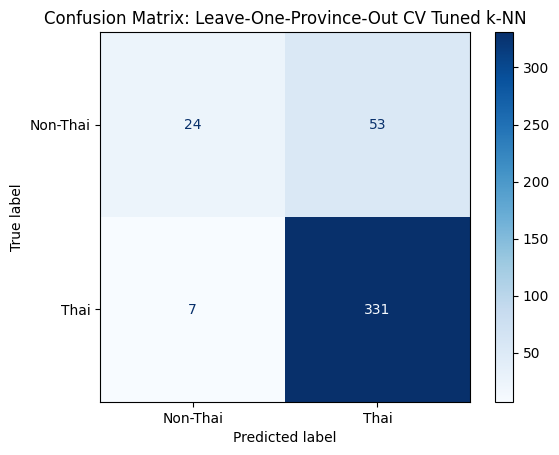

Class: Non-Thai
precision: 0.7741935483870968
recall: 0.3116883116883117
f1-score: 0.4444444444444444
support: 77.0

Class: Thai
precision: 0.8619791666666666
recall: 0.9792899408284024
f1-score: 0.9168975069252078
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.8180863575268817
recall: 0.6454891262583571
f1-score: 0.6806709756848262
support: 415.0

Class: weighted avg
precision: 0.8456912326726259
recall: 0.8554216867469879
f1-score: 0.829237541115524
support: 415.0



In [66]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best k-NN model with the obtained parameters
best_knn = KNeighborsClassifier(**grid_search_knn.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_knn.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_knn.predict(X_train)
    y_test_pred = best_knn.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned k-NN - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_knn_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned k-NN Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_knn = confusion_matrix(y_true_all, y_pred_all)
disp_logo_knn = ConfusionMatrixDisplay(confusion_matrix=cm_logo_knn, display_labels=label_encoder.classes_)
disp_logo_knn.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned k-NN')
plt.show()

# Display the detailed results
for class_name, metrics in report_knn_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with GBC

Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: 1.0
Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: 0.796156152290721
Leave-One-Province-Out CV Tuned GBC Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.69      0.40      0.51        77
        Thai       0.88      0.96      0.92       338

    accuracy                           0.86       415
   macro avg       0.78      0.68      0.71       415
weighted avg       0.84      0.86      0.84       415



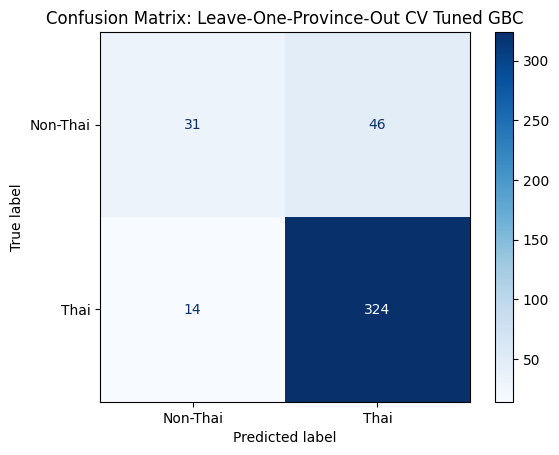

Class: Non-Thai
precision: 0.6888888888888889
recall: 0.4025974025974026
f1-score: 0.5081967213114754
support: 77.0

Class: Thai
precision: 0.8756756756756757
recall: 0.9585798816568047
f1-score: 0.9152542372881356
support: 338.0

accuracy: 0.8554216867469879

Class: macro avg
precision: 0.7822822822822824
recall: 0.6805886421271037
f1-score: 0.7117254792998056
support: 415.0

Class: weighted avg
precision: 0.8410188501754767
recall: 0.8554216867469879
f1-score: 0.8397279029984902
support: 415.0



In [67]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the best Gradient Boosting Classifier model with the obtained parameters
best_gbc = GradientBoostingClassifier(**grid_search_gbc.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_gbc.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_gbc.predict(X_train)
    y_test_pred = best_gbc.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned GBC - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned GBC - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_gbc_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned GBC Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_gbc = confusion_matrix(y_true_all, y_pred_all)
disp_logo_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_logo_gbc, display_labels=label_encoder.classes_)
disp_logo_gbc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned GBC')
plt.show()

# Display the detailed results
for class_name, metrics in report_gbc_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


Summary of LOGOV Results So Far:
Extra Trees:

Train Accuracy: 1.0
Test Accuracy: 0.7700
Weighted Avg Precision: 0.8163
Weighted Avg Recall: 0.8410
Weighted Avg F1-Score: 0.8115
LightGBM:

Train Accuracy: 1.0
Test Accuracy: 0.7994
Weighted Avg Precision: 0.8214
Weighted Avg Recall: 0.8482
Weighted Avg F1-Score: 0.8233
Random Forest:

Train Accuracy: 1.0
Test Accuracy: 0.7815
Weighted Avg Precision: 0.7992
Weighted Avg Recall: 0.8265
Weighted Avg F1-Score: 0.8059
k-NN:

Train Accuracy: 0.9573
Test Accuracy: 0.7829
Weighted Avg Precision: 0.8103
Weighted Avg Recall: 0.8386
Weighted Avg F1-Score: 0.8133
GBC:

Train Accuracy: 1.0
Test Accuracy: 0.7804
Weighted Avg Precision: 0.8027
Weighted Avg Recall: 0.8337
Weighted Avg F1-Score: 0.8083

LOGOV with LDA

Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: 0.8896160318057791
Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: 0.6877331222344009
Leave-One-Province-Out CV Tuned LDA Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.46      0.08      0.13        77
        Thai       0.82      0.98      0.89       338

    accuracy                           0.81       415
   macro avg       0.64      0.53      0.51       415
weighted avg       0.76      0.81      0.75       415



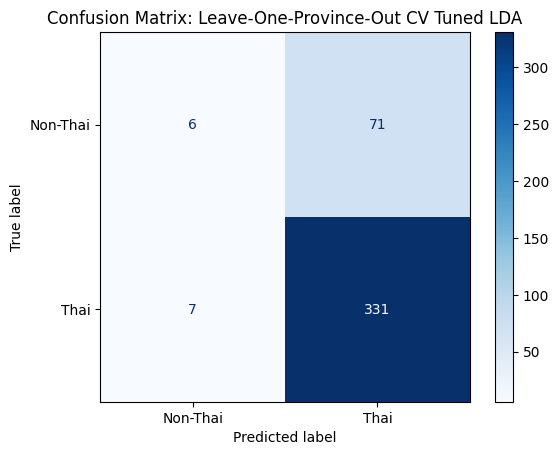

Class: Non-Thai
precision: 0.46153846153846156
recall: 0.07792207792207792
f1-score: 0.13333333333333333
support: 77.0

Class: Thai
precision: 0.8233830845771144
recall: 0.9792899408284024
f1-score: 0.8945945945945946
support: 338.0

accuracy: 0.8120481927710843

Class: macro avg
precision: 0.642460773057788
recall: 0.5286060093752402
f1-score: 0.5139639639639639
support: 415.0

Class: weighted avg
precision: 0.7562456484952439
recall: 0.8120481927710843
f1-score: 0.7533485292521436
support: 415.0



In [68]:
# Define the best LDA model with the obtained parameters
best_lda = LinearDiscriminantAnalysis(**grid_search_lda.best_params_)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_lda.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_lda.predict(X_train)
    y_test_pred = best_lda.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned LDA - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned LDA - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_lda_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned LDA Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_lda = confusion_matrix(y_true_all, y_pred_all)
disp_logo_lda = ConfusionMatrixDisplay(confusion_matrix=cm_logo_lda, display_labels=label_encoder.classes_)
disp_logo_lda.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned LDA')
plt.show()

# Display the detailed results
for class_name, metrics in report_lda_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()


LOGOV with Logistic Regression

Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: 0.8926108002560268
Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: 0.6759875965474536
Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report
              precision    recall  f1-score   support

    Non-Thai       0.33      0.05      0.09        77
        Thai       0.82      0.98      0.89       338

    accuracy                           0.80       415
   macro avg       0.58      0.51      0.49       415
weighted avg       0.73      0.80      0.74       415



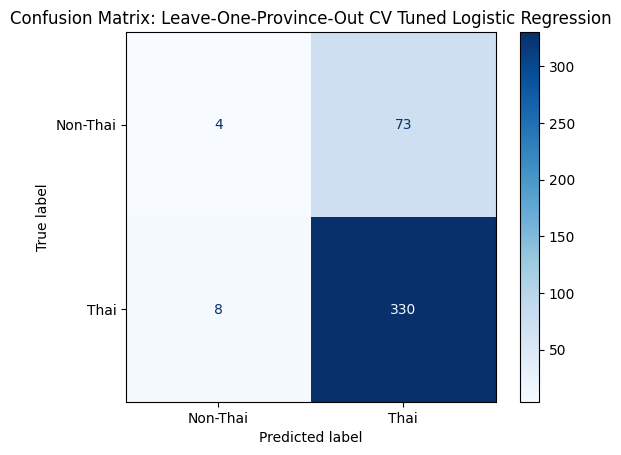

Class: Non-Thai
precision: 0.3333333333333333
recall: 0.05194805194805195
f1-score: 0.0898876404494382
support: 77.0

Class: Thai
precision: 0.8188585607940446
recall: 0.9763313609467456
f1-score: 0.8906882591093117
support: 338.0

accuracy: 0.8048192771084337

Class: macro avg
precision: 0.5760959470636889
recall: 0.5141397064473987
f1-score: 0.49028794977937495
support: 415.0

Class: weighted avg
precision: 0.7287731571447078
recall: 0.8048192771084337
f1-score: 0.7421059756471183
support: 415.0



In [69]:
# Define the best Logistic Regression model with the obtained parameters
best_logreg = LogisticRegression(**grid_search_logreg.best_params_, random_state=42)

# Initialize Leave-One-Group-Out Cross-Validation
logo = LeaveOneGroupOut()

# List of provinces to use as groups
prov_codes = ['SKM', 'PLG', 'JHR', 'SSX', 'PNA', 'KTX']

# Map 'prov_char' to integer labels
groups = df['prov_char']

# Filter out samples not in the selected provinces
X_filtered = X_rfe[groups != -1]
y_filtered = y[groups != -1]
groups_filtered = [g for g in groups if g != -1]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
y_true_all = []
y_pred_all = []

# Apply LOGO-CV
for train_index, test_index in logo.split(X_filtered, y_filtered, groups_filtered):
    X_train, X_test = X_filtered[train_index], X_filtered[test_index]
    y_train, y_test = y_filtered[train_index], y_filtered[test_index]
    
    # Fit the model
    best_logreg.fit(X_train, y_train)
    
    # Predict the train and test samples
    y_train_pred = best_logreg.predict(X_train)
    y_test_pred = best_logreg.predict(X_test)
    
    # Calculate and store train and test accuracies
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))
    
    # Store the prediction and actual value
    y_true_all.extend(y_test)
    y_pred_all.extend(y_test_pred)

# Calculate average accuracies
avg_train_accuracy = np.mean(train_accuracies)
avg_test_accuracy = np.mean(test_accuracies)

print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Train Accuracy: {avg_train_accuracy}')
print(f'Leave-One-Province-Out CV with Tuned Logistic Regression - Average Test Accuracy: {avg_test_accuracy}')

# Generate the classification report for the overall test predictions
report_logreg_logo = classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_, output_dict=True)
print("Leave-One-Province-Out CV Tuned Logistic Regression Model Classification Report")
print(classification_report(y_true_all, y_pred_all, target_names=label_encoder.classes_))

# Plot the confusion matrix if it's different
cm_logo_logreg = confusion_matrix(y_true_all, y_pred_all)
disp_logo_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logo_logreg, display_labels=label_encoder.classes_)
disp_logo_logreg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix: Leave-One-Province-Out CV Tuned Logistic Regression')
plt.show()

# Display the detailed results
for class_name, metrics in report_logreg_logo.items():
    if isinstance(metrics, dict):
        print(f"Class: {class_name}")
        for metric_name, score in metrics.items():
            print(f"{metric_name}: {score}")
    else:
        print(f"{class_name}: {metrics}")
    print()
